# Table of Contents

- [Initialization](#initialization)
  - [**Importing libraries**](#**importing-libraries**)
  - [**Loading datasets**](#**loading-datasets**)
  - [**Utility Functions**](#**utility-functions**)
- [Data Semantics](#data-semantics)
  - [First look at the datasets](#first-look-at-the-datasets)
  - [**Heatmap** of datasets](#**heatmap**-of-datasets)
    - [Info on missing values on **Cyclists** dataframe](#info-on-missing-values-on-**cyclists**-dataframe)
  - [Info on missing values on **Races** dataframe](#info-on-missing-values-on-**races**-dataframe)
  - [**Info about the features**](#**info-about-the-features**)
  - [**Dropping duplicates**](#**dropping-duplicates**)
  - [**Type Casting**](#**type-casting**)
  - [**Semantic check**](#**semantic-check**)
- [Data Distribution BEFORE fixing missing values](#data-distribution-before-fixing-missing-values)
    - [**CYCLISTS**](#**cyclists**)
      - [**Height** distribution](#**height**-distribution)
      - [**Weight** distribution](#**weight**-distribution)
      - [**Birth Year** display](#**birth-year**-display)
      - [**Nationality** display](#**nationality**-display)
    - [**RACES**](#**races**)
      - [Mean **Points** trend](#mean-**points**-trend)
      - [Mean **UCI Points** trend](#mean-**uci-points**-trend)
      - [mean **Length** group by **race name** trend](#mean-**length**-group-by-**race-name**-trend)
      - [mean **Climb Length** group by **race name** trend](#mean-**climb-length**-group-by-**race-name**-trend)
      - [**Profile** display](#**profile**-display)
      - [**Type of Road** display](#**type-of-road**-display)
      - [**Cyclist Age** distribution over the year](#**cyclist-age**-distribution-over-the-year)
      - [**Number of competing cyclists** trend](#**number-of-competing-cyclists**-trend)
      - [**Number of Races** trend](#**number-of-races**-trend)
- [Fixing Missing Values](#fixing-missing-values)
    - [**CYCLIST** dataframe](#**cyclist**-dataframe)
      - [**MANUAL FIXING**](#**manual-fixing**)
      - [**Birth Year** fixing](#**birth-year**-fixing)
      - [**Height** & **Weight** fixing](#**height**-&-**weight**-fixing)
        - [**Height** fixing](#**height**-fixing)
        - [**Weight** fixing](#**weight**-fixing)
        - [**Check**](#**check**)
      - [Cyclists dataframe AFTER fixing](#cyclists-dataframe-after-fixing)
    - [**RACES** dataframe](#**races**-dataframe)
      - [**Points** fixing](#**points**-fixing)
      - [**UCI Points** fix](#**uci-points**-fix)
      - [**Cyclist Team** fix](#**cyclist-team**-fix)
      - [**Cyclist Age** fix](#**cyclist-age**-fix)
      - [**Climb Total** fix](#**climb-total**-fix)
      - [**Profile** fix](#**profile**-fix)
      - [Races dataframe AFTER fixing](#races-dataframe-after-fixing)
- [Data Cleaning & Outlier Detection](#data-cleaning-&-outlier-detection)
    - [**CYCLIST** dataframe](#**cyclist**-dataframe)
      - [**Height** cleaning](#**height**-cleaning)
        - [Height distribution Before/After *Comparison*](#height-distribution-before/after-*comparison*)
        - [*Outlier detection* on Height](#*outlier-detection*-on-height)
      - [**Weight** cleaning](#**weight**-cleaning)
        - [Weight distribution Before/After *Comparison*](#weight-distribution-before/after-*comparison*)
        - [*Outlier detection* on Height](#*outlier-detection*-on-height)
      - [*Insights* on Height & Weight Outliers](#*insights*-on-height-&-weight-outliers)
      - [**Cyclists** cleaning](#**cyclists**-cleaning)
    - [**RACES** dataframe](#**races**-dataframe)
      - [**Points** cleaning](#**points**-cleaning)
        - [Points of each different race over the year](#points-of-each-different-race-over-the-year)
      - [**Length** cleaning](#**length**-cleaning)
      - [*Insight* on Points & Length](#*insight*-on-points-&-length)
      - [**Cyclist age** fix](#**cyclist-age**-fix)
      - [**Delta** fix](#**delta**-fix)
    - [**Correlation Matrix**](#**correlation-matrix**)
    - [New **Features**](#new-**features**)
      - [**BMI**](#**bmi**)
      - [**Number of Races Participated**](#**number-of-races-participated**)
    - [**Exporting**](#**exporting**)


# Initialization

## **Importing libraries**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc
import math

## **Loading datasets**

In [113]:
races_df = pd.read_csv('./races.csv')
cyclists_df = pd.read_csv('./cyclists.csv')

## **Utility Functions**

In [114]:
# Function that displays the number of missing values and their percentage in a dataframe
def display_missing_values(df: pd.DataFrame, df_name: str) -> None:
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df) * 100).round(2)
    
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    
    print(f"Number of missing values and their percentage in {df_name}:\n")
    print(missing_data)

# Data Semantics

## First look at the datasets

In [115]:
cyclists_df.head()
cyclists_df.info()

races_df.head()
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non

## **Heatmap** of datasets

### Info on missing values on **Cyclists** dataframe

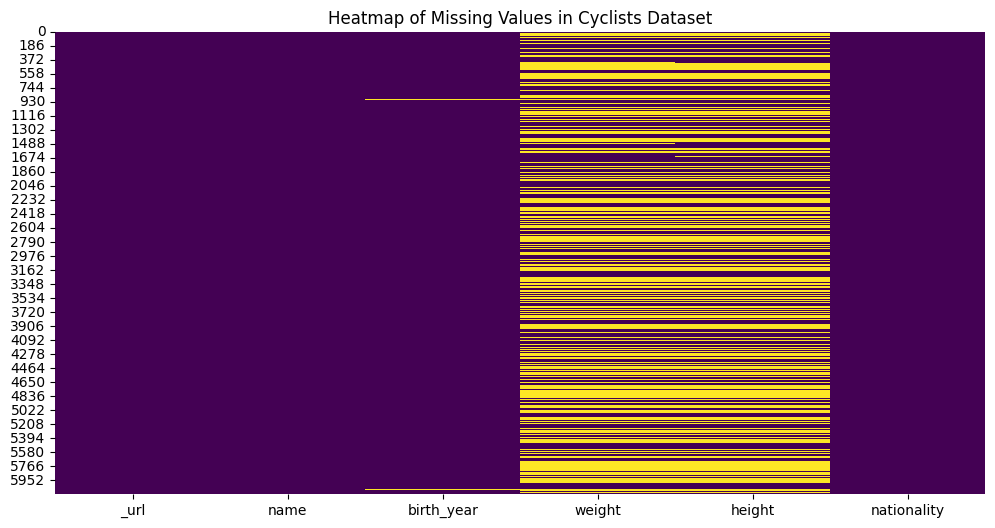

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64


In [116]:
plt.figure(figsize=(12, 6))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Cyclists Dataset')
plt.show()

missing_cyclists = cyclists_df[cyclists_df.isnull().any(axis=1)]
print(missing_cyclists.isnull().sum())

### Info on missing values on **Races** dataframe

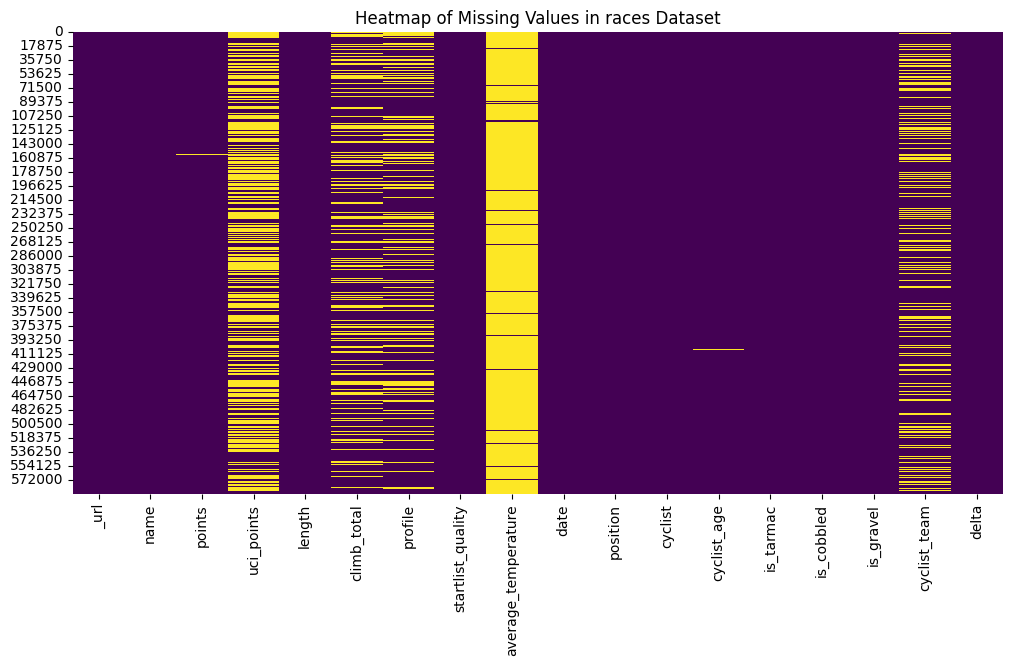

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


In [117]:
plt.figure(figsize=(12, 6))
sns.heatmap(races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in races Dataset')
plt.show()

missing_races = races_df[races_df.isnull().any(axis=1)]
print(missing_races.isnull().sum()) 

Upon observing the heatmap, we notice that [average_temperature] has most of its records missing, so we decided to drop it

In [118]:
races_df = races_df.drop(['average_temperature'], axis=1)

## **Info about the features**

**CATEGORICAL** attribues:
- **_url** --> string
    - unique identifier of the cyclist formed by their name surname and a number (if there are more than 1 cyclist with the same name)
- **name** --> string
    - the name of the cyclists formed by name and surname 
- **nationality** --> string
    - the nationality of the cyclist
- **_url** --> string
    - unique identifier of the race formed by the name of the race, the year of competition and the stage name
- **name** --> string
    - name of the race
- **profile** --> int
    - the difficulty level of the course
- **cyclist** --> string
    - name of the cyclist participating the race
- **cyclist_team** --> string
    - the cyclist team which the cyclist is running for

**BINARY** attributes:
- **is_tarmac** --> boolean
    - whether the course is run on tarmac   
- **is_cobbled** --> boolean
    - whether the course is run on cobble
- **is_gravel** --> boolean
    - whether the course is run on gravel

**NUMERICAL** attributes:
- **birth_year** --> int
    - the birth year of the cyclist
- **weight** --> int
    - the weight of the cyclist, measured in kg
- **height** --> int
    - the height of the cyclist, measured in cm
- **points** --> int
    - the points assigned to the race
- **uci_points** --> int
    - the UCI points assigned to the race, an alternative to the points
- **length** --> int
    - the total length of the course, measured in m
- **climb_total** --> int
    - the length of course that is not flat, measured in m
- **startlist_quality** --> int
    - indicates how strong is the cyclist
- **day** --> date
    - day on which the race is held, has the format [yy/mm/dd]
- **cyclist_age** --> int
    - indicates the age of cyclist at the time of race
- **delta** --> int
    - measures how much time the cyclist finishes the race after the 1st racer, measured in seconds

**ORDINAL** arttribute:
- **position** --> int
    - the order in which, each cyclist arrives at the finish line in the race, starts at 0

## **Dropping duplicates**

In [119]:
duplicates = cyclists_df.duplicated().sum()
print(f"number of duplicated records in cyclists = {duplicates}")
duplicates = races_df.duplicated(subset=['_url', 'name', 'climb_total', 'length', 'date', 'cyclist', 'cyclist_team', 'position', 'delta']).sum()
print(f"number of duplicated records in races = {duplicates}")

# drop duplicates in the race daraframe
races_df = races_df.drop_duplicates(subset=['_url', 'name', 'climb_total', 'length', 'date', 'cyclist', 'cyclist_team', 'position', 'delta'])

number of duplicated records in cyclists = 0
number of duplicated records in races = 0


## **Type Casting**

In [120]:
# Convert [object] to [string] and then unify in lower case
to_str = ['_url', 'name', 'nationality']
cyclists_df[to_str] = cyclists_df[to_str].astype('string', errors='ignore')
for column in to_str:
    cyclists_df[column] = cyclists_df[column].str.lower()

to_str = ['_url', 'name', 'cyclist', 'cyclist_team']
races_df[to_str] = races_df[to_str].astype('string', errors='ignore')
for column in to_str:
    races_df[column] = races_df[column].str.lower()

# Convert [float] to [int]
to_int = ['weight', 'height', 'birth_year']
cyclists_df[to_int] = cyclists_df[to_int].round().astype('Int64', errors='ignore')

to_int = ['points', 'uci_points', 'climb_total', 'length', 'profile', 'cyclist_age', 'delta']
races_df[to_int] = races_df[to_int].round().astype('Int64', errors='ignore')

# Separate the date into day and time
races_df[['day', 'starting_time']] = races_df['date'].str.split(' ', expand=True) 
races_df['day'] = pd.to_datetime(races_df['day'], errors='coerce')

# Drop the date column for it is redundant
races_df = races_df.drop(['date'], axis=1)
# Drop the starting_time column for it contains too much noise and not provide much useful information for analysis
races_df = races_df.drop(['starting_time'], axis=1)

In [121]:
cyclists_df.info()
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _url         6134 non-null   string
 1   name         6134 non-null   string
 2   birth_year   6121 non-null   Int64 
 3   weight       3078 non-null   Int64 
 4   height       3143 non-null   Int64 
 5   nationality  6133 non-null   string
dtypes: Int64(3), string(3)
memory usage: 305.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589865 non-null  string        
 1   name               589865 non-null  string        
 2   points             589388 non-null  Int64         
 3   uci_points         251086 non-null  Int64         
 4   length             589865 non-null  Int64         
 5   climb_t

## **Semantic check**

We also want to check if all the records of the same race ([_url]) have the same attributes on the race itself

In [122]:
# we only want to compare the columns related to the race, not the cyclist
columns_to_compare = ['length', 'climb_total', 'points', 'uci_points', 'profile', 'startlist_quality', 'name']

# Group by '_url' and check if the attributes are equal within each group
mismatched_records = races_df.groupby('_url').filter(lambda group: not group[columns_to_compare].apply(lambda x: (x == x.iloc[0]).all()).all())

# Display the mismatched records
if not mismatched_records.empty:
    print("Records with mismatched attributes:")
    print(mismatched_records)
else:
    print("No mismatched records found.")

No mismatched records found.


We also want to check whether [position] and [delta] are semantically coherent

In [123]:
# Check that for records where position is 0, delta is also 0
position_zero_delta_check = (races_df[races_df['position'] == 0]['delta'] == 0).all()
print(f"All records where position is 0 have delta as 0: {position_zero_delta_check}")

All records where position is 0 have delta as 0: True


We want to make sure that [climb_total], which is a part of the couse has smaller value than [length]

In [124]:
invalid_records = races_df[races_df['climb_total'] > races_df['length']]

# Display the mismatched records
if not invalid_records.empty:
    print("Records where climb_total is greater than length:")
    print(invalid_records)
else:
    print("No mismatched records found.")


No mismatched records found.


We also want to make sure that no-two cyclists have the same arrival position in a race, for they should be monotonically increasing of 1 

In [125]:
# Group by '_url' and check if the 'position' values are unique within each group
position_unique_check = races_df.groupby('_url')['position'].nunique() == races_df.groupby('_url')['position'].count()

# Check if all values are True
all_positions_unique = position_unique_check.all()

print(f"All positions are unique within each _url: {all_positions_unique}")

All positions are unique within each _url: True


# Data Distribution BEFORE fixing missing values

### **CYCLISTS**

In [126]:
cyclists_df.describe()

,birth_year,weight,height
count,6121.0,3078.0,3143.0
mean,1974.071884,68.658869,179.815145
std,15.535834,6.348963,6.443447
min,1933.0,48.0,154.0
25%,1962.0,64.0,175.0
50%,1974.0,69.0,180.0
75%,1987.0,73.0,184.0
max,2004.0,94.0,204.0


#### **Height** distribution

The number of bins is calculated according to **scott's rule**, which is commonly used for a distribution that is more or less normal for a dataset with such number of records and is much more robust, without under/over-estimating the number of bins

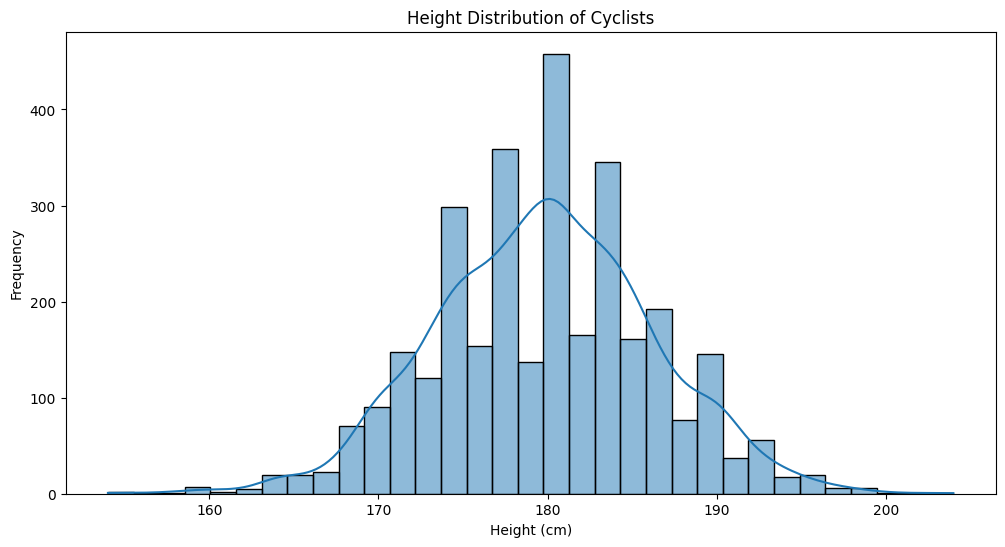

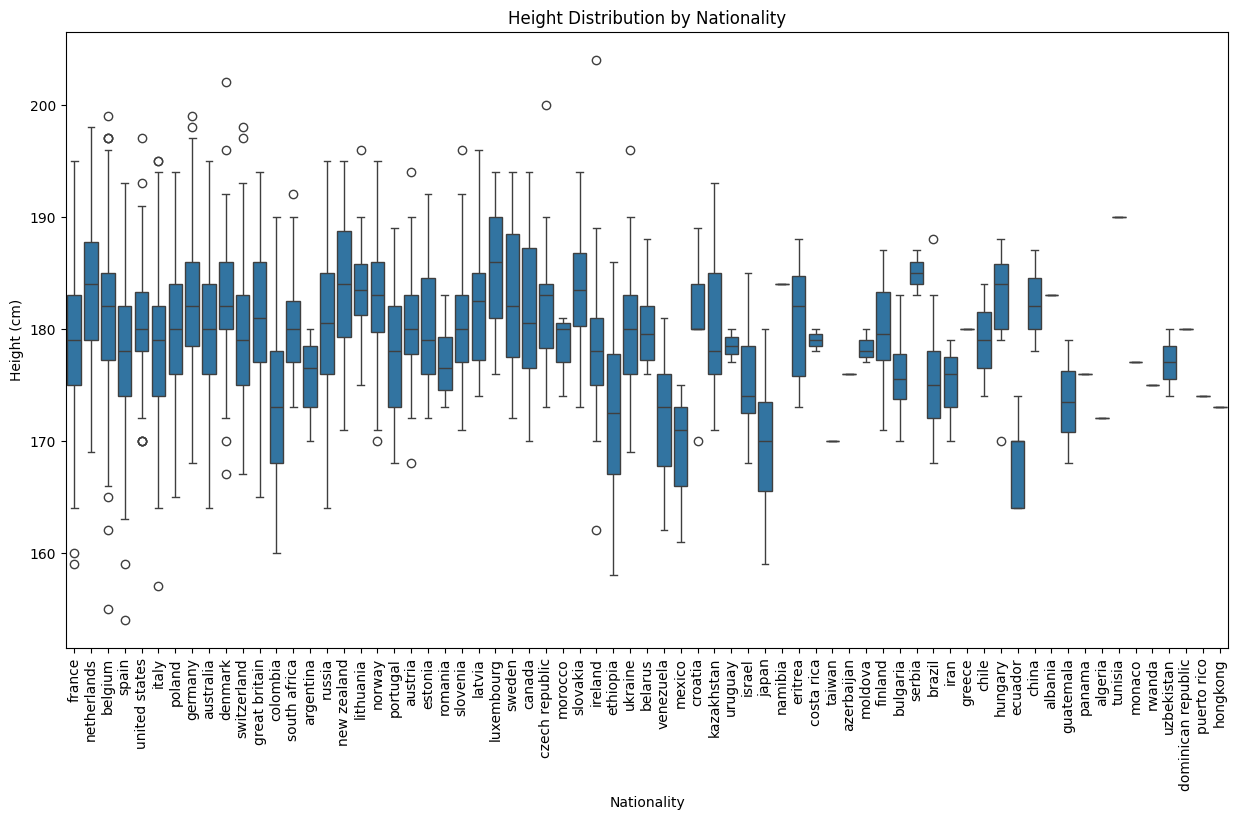

In [127]:
copy_cyclist = cyclists_df[cyclists_df['height'].notnull()].copy()

# Distribution of height among cyclists
plt.figure(figsize=(12, 6))
sns.histplot(copy_cyclist['height'], bins='scott', kde=True)
plt.title('Height Distribution of Cyclists')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Distribution of height among cyclists according to their nationality
plt.figure(figsize=(15, 8))
sns.boxplot(x='nationality', y='height', data=copy_cyclist)
plt.xticks(rotation=90)
plt.title('Height Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.show()

#### **Weight** distribution

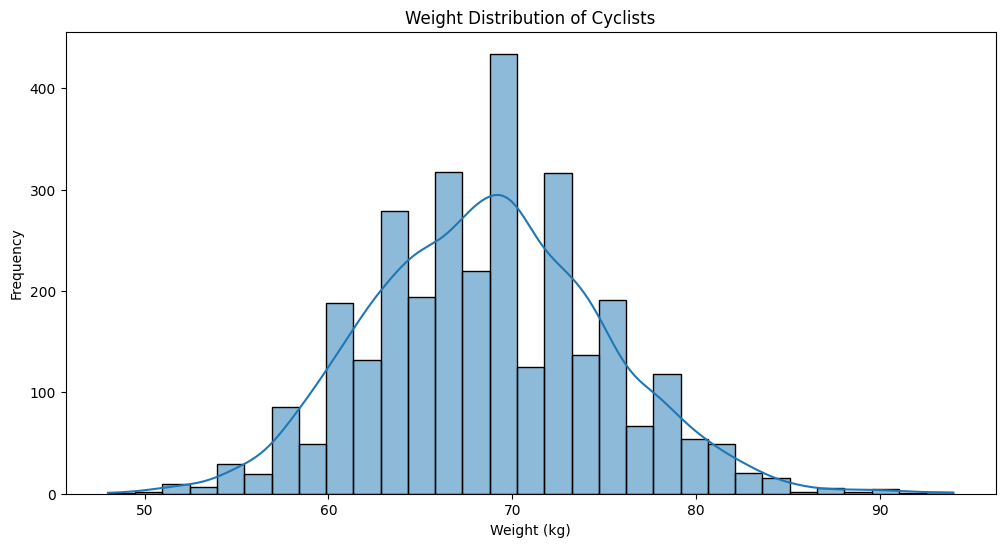

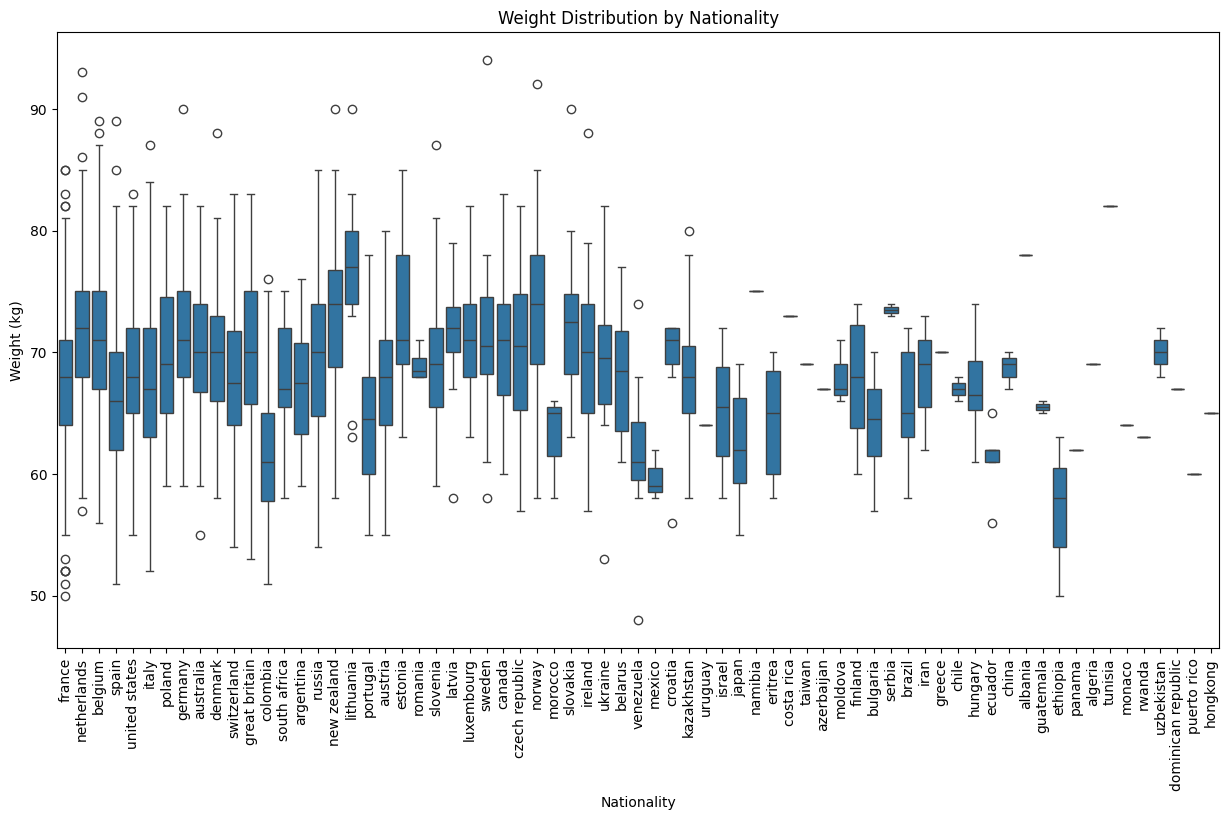

In [128]:
copy_cyclist = cyclists_df[cyclists_df['weight'].notnull()].copy()

# Distribution of weight among cyclists
plt.figure(figsize=(12, 6))
sns.histplot(copy_cyclist['weight'], bins='scott', kde=True)
plt.title('Weight Distribution of Cyclists')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of weight among cyclists according to their nationality
plt.figure(figsize=(15, 8))
sns.boxplot(x='nationality', y='weight', data=copy_cyclist)
plt.xticks(rotation=90)
plt.title('Weight Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.show()

#### **Birth Year** display

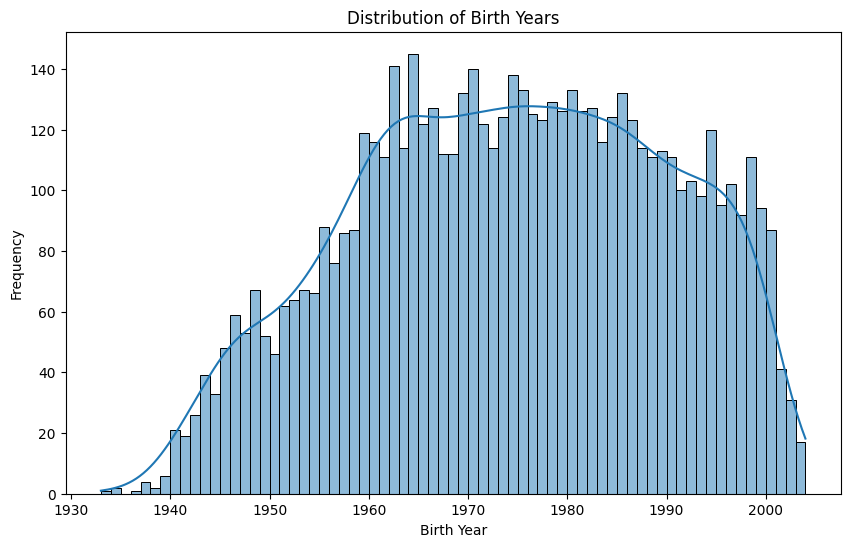

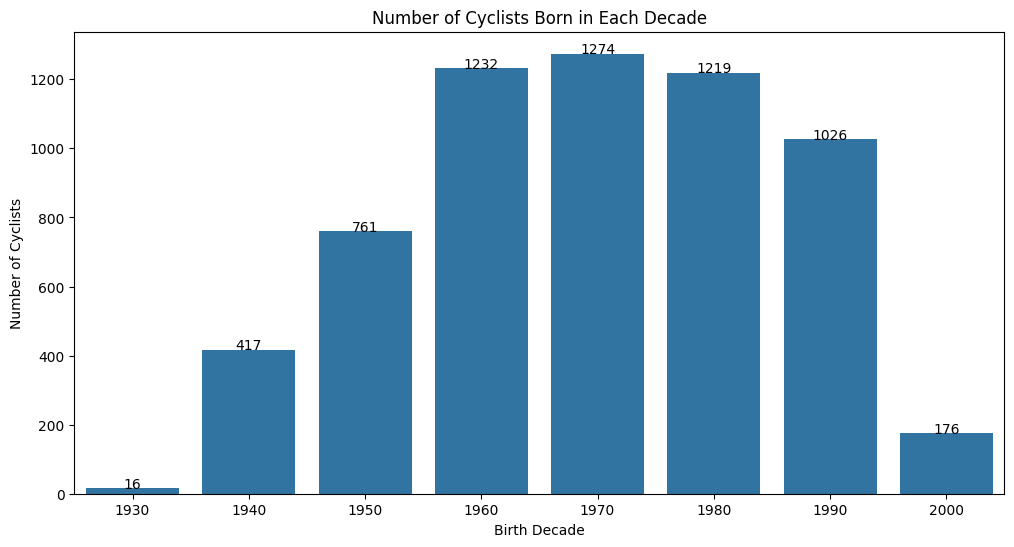

In [129]:
copy_cyclist = cyclists_df[cyclists_df['birth_year'].notnull()].copy()
birth_year_summary = copy_cyclist['birth_year'].describe()
bin = birth_year_summary['max'] - birth_year_summary['min']
bin = bin.astype(int)

# Distribution of birth years of the cyclists
plt.figure(figsize=(10, 6))
sns.histplot(copy_cyclist['birth_year'], bins=bin, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Extract the first three digits of the birth year and convert to integer
birth_decades = (copy_cyclist['birth_year'] // 10 * 10).astype(int)
# Count the number of occurrences for each decade
birth_decade_counts = birth_decades.value_counts().sort_index()

# Display the number of cyclists born in each decade
plt.figure(figsize=(12, 6))
sns.barplot(x=birth_decade_counts.index, y=birth_decade_counts.values)
plt.title('Number of Cyclists Born in Each Decade')
plt.xlabel('Birth Decade')
plt.ylabel('Number of Cyclists')

# Annotate the number of each bar in the graph
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height().astype('int64')}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

#### **Nationality** display

Summary Statistics for Nationality:
nationality
italy                 1029
spain                  872
belgium                869
france                 741
netherlands            380
                      ... 
dominican republic       1
liechtenstein            1
zimbabwe                 1
puerto rico              1
hongkong                 1
Name: count, Length: 72, dtype: Int64


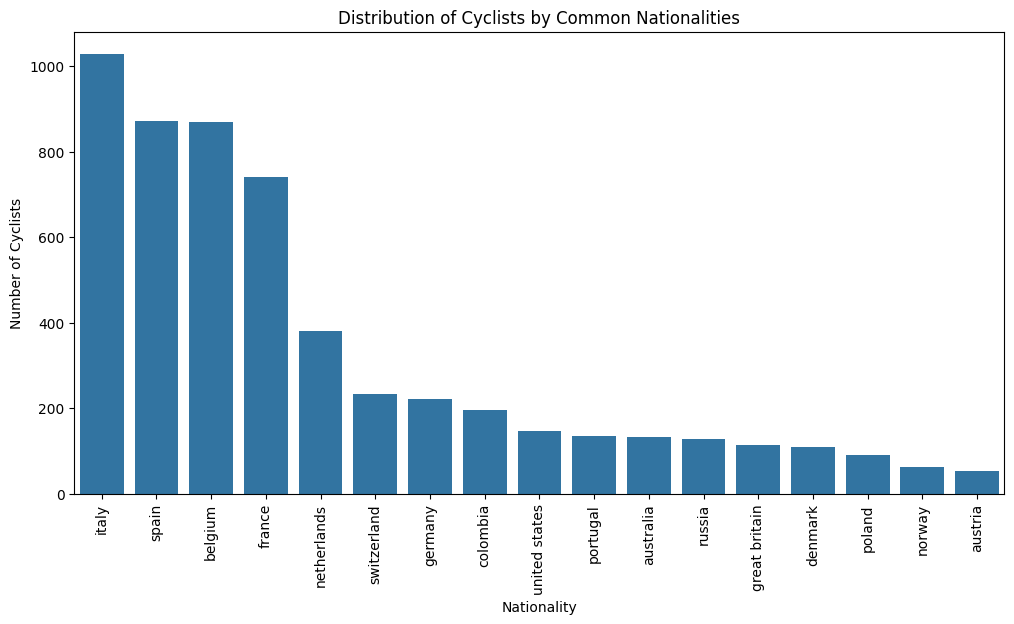

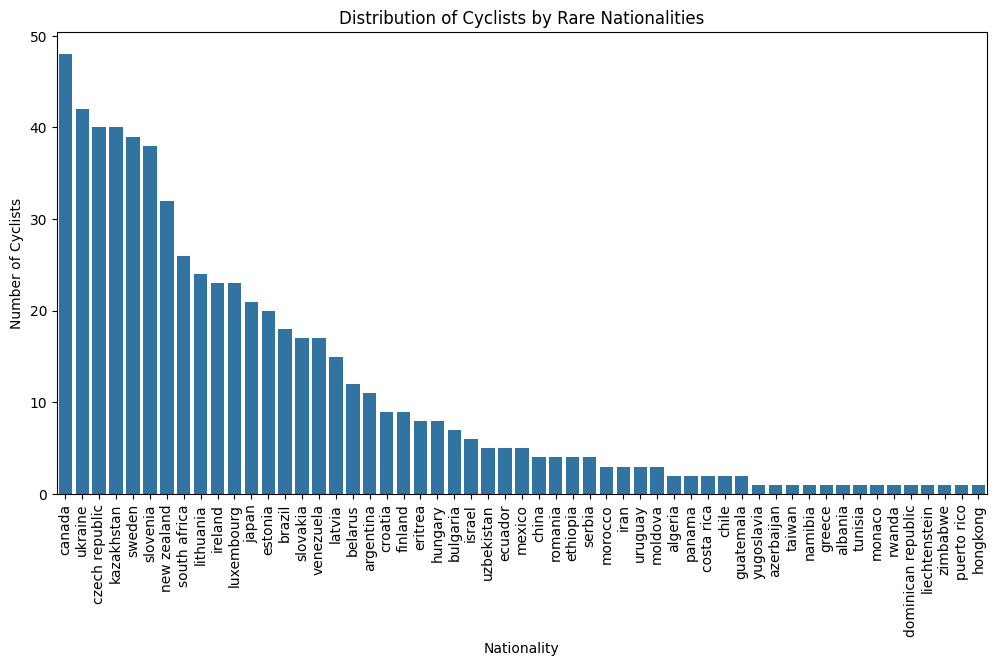

Distinct Nationalities:
<StringArray>
[             'italy',             'france',        'netherlands',
            'belgium',              'spain',      'united states',
                 <NA>,             'norway',             'russia',
             'poland',            'germany',          'australia',
        'switzerland',            'ireland',            'denmark',
      'great britain',           'colombia',       'south africa',
          'argentina',        'new zealand',          'lithuania',
           'portugal',            'austria',         'yugoslavia',
            'estonia',            'romania',           'slovenia',
             'canada',             'latvia',         'luxembourg',
             'sweden',     'czech republic',           'slovakia',
            'morocco',            'ukraine',           'ethiopia',
            'belarus',          'venezuela',              'japan',
             'mexico',            'croatia',         'kazakhstan',
            'uruguay',  

In [130]:
copy_cyclist = cyclists_df[cyclists_df['nationality'].notnull()].copy()
# Summary statistics for nationality
nationality_summary = copy_cyclist['nationality'].value_counts()
print("Summary Statistics for Nationality:")
print(nationality_summary)

# Count the number of occurrences for each nationality
nationality_counts = copy_cyclist['nationality'].value_counts()

# Separate nationalities with more than 50 counts and those with 50 or fewer counts
common_nationalities = nationality_counts[nationality_counts > 50]
rare_nationalities = nationality_counts[nationality_counts <= 50]

# Plot common nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=common_nationalities.index, y=common_nationalities.values)
plt.title('Distribution of Cyclists by Common Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=90)
plt.show()

# Plot rare nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=rare_nationalities.index, y=rare_nationalities.values)
plt.title('Distribution of Cyclists by Rare Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=90)
plt.show()

# Show distinct nationalities
distinct_nationalities = cyclists_df['nationality'].unique()
print("Distinct Nationalities:")
print(distinct_nationalities)

# Nationalities with low frequency
rare_nationalities = nationality_summary[nationality_summary <= 2]
print("Nationalities with Frequency less or equal than 2:")
print(rare_nationalities)

### **RACES**

In [131]:
races_df.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,day
count,589388.0,251086.0,589865.0,442820.0,441671.0,589865.000000,589865.000000,589752.0,589865.0,589865
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,74.219491,28.486208,418.292794,2006-08-11 17:59:28.544666880
min,18.0,6.0,1000.0,2.0,1.0,115.000000,0.000000,13.0,-6906.0,1970-02-28 00:00:00
25%,50.0,16.0,152500.0,1309.0,1.0,844.000000,32.000000,26.0,10.0,1999-07-18 00:00:00
50%,80.0,60.0,178200.0,2255.0,2.0,988.000000,70.000000,28.0,156.0,2008-05-03 00:00:00
75%,100.0,100.0,203500.0,3273.0,4.0,1309.000000,112.000000,31.0,624.0,2015-08-29 00:00:00
max,350.0,800.0,338000.0,6974.0,5.0,2047.000000,209.000000,56.0,61547.0,2023-07-29 00:00:00
std,54.43533,100.947962,64545.605664,1375.710722,1.491741,380.586928,48.404023,3.855631,842.961596,NaN


#### Mean **Points** trend

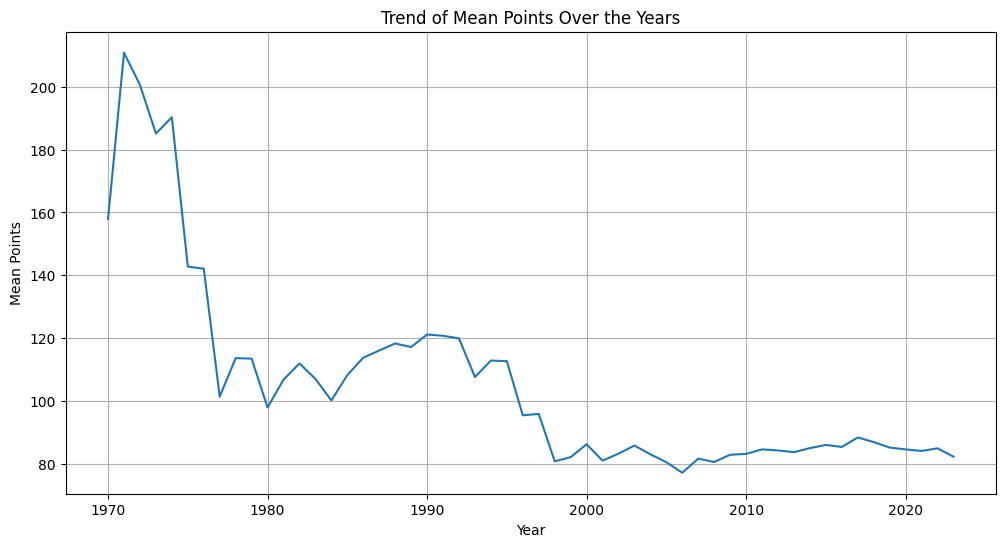

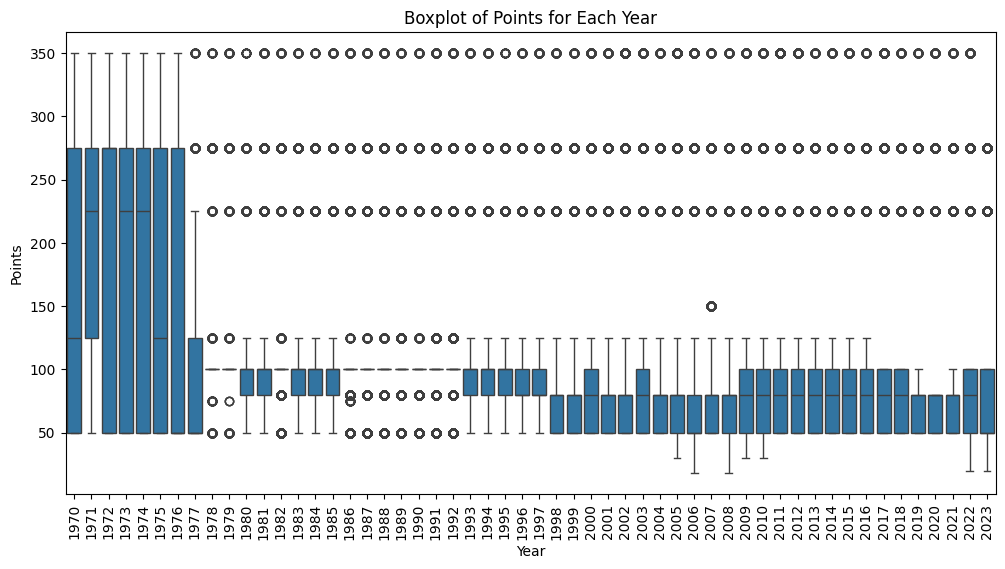

In [132]:
# Calculate the mean of 'points' for each year
copy_races = races_df[races_df['points'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year
mean_points_per_year = copy_races.groupby('year')['points'].mean()

# Plot the trend of mean points over the years
plt.figure(figsize=(12, 6))
mean_points_per_year.plot(kind='line')
plt.title('Trend of Mean Points Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Points')
plt.grid(True)
plt.show()

# Boxplot of points for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='points', data=copy_races)
plt.title('Boxplot of Points for Each Year')
plt.xlabel('Year')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

#### Mean **UCI Points** trend

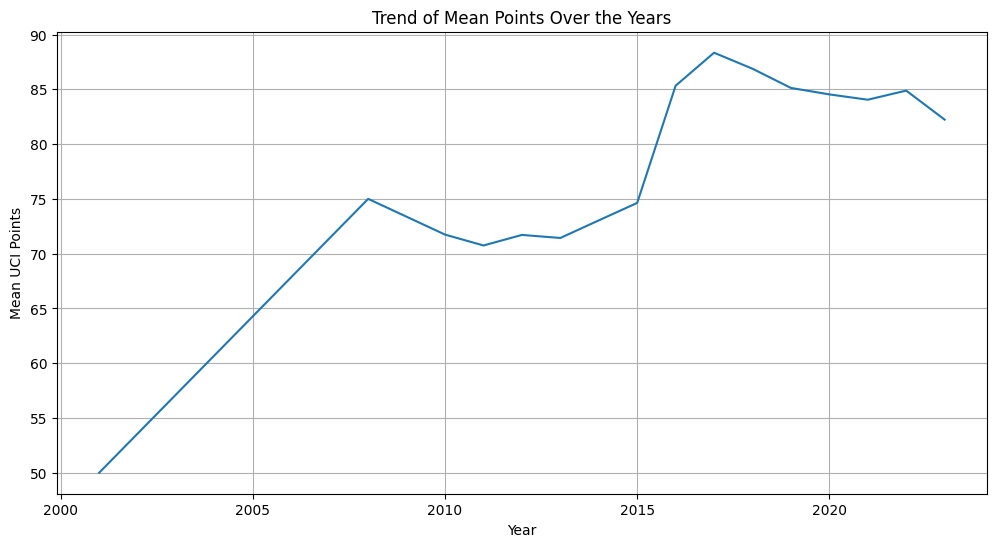

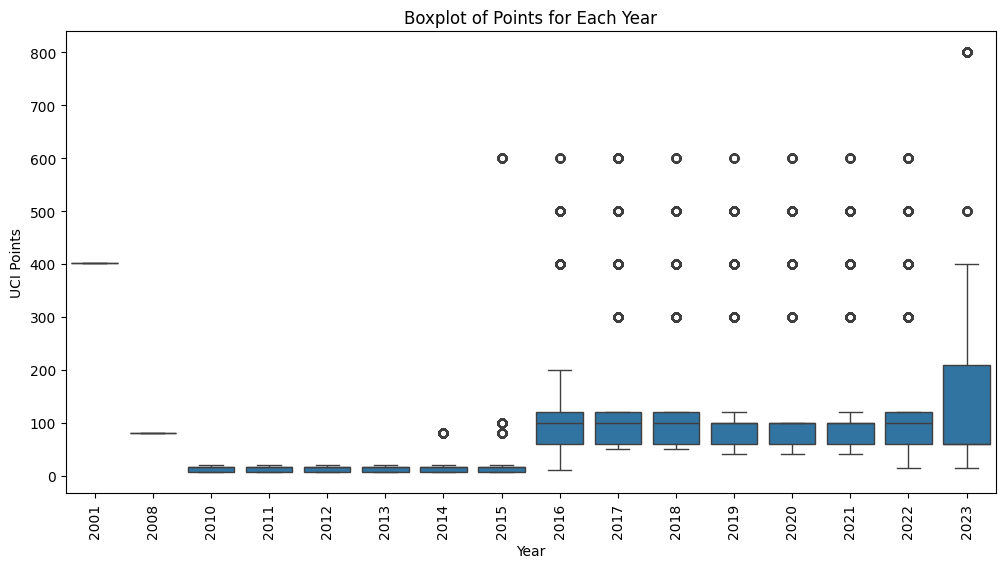

In [133]:
# Calculate the mean of 'points' for each year
copy_races = races_df[races_df['uci_points'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year
mean_ucipoints_per_year = copy_races.groupby('year')['points'].mean()

# Plot the trend of mean points over the years
plt.figure(figsize=(12, 6))
mean_ucipoints_per_year.plot(kind='line')
plt.title('Trend of Mean Points Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean UCI Points')
plt.grid(True)
plt.show()

# Boxplot of points for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='uci_points', data=copy_races)
plt.title('Boxplot of Points for Each Year')
plt.xlabel('Year')
plt.ylabel('UCI Points')
plt.xticks(rotation=90)
plt.show()

#### mean **Length** group by **race name** trend

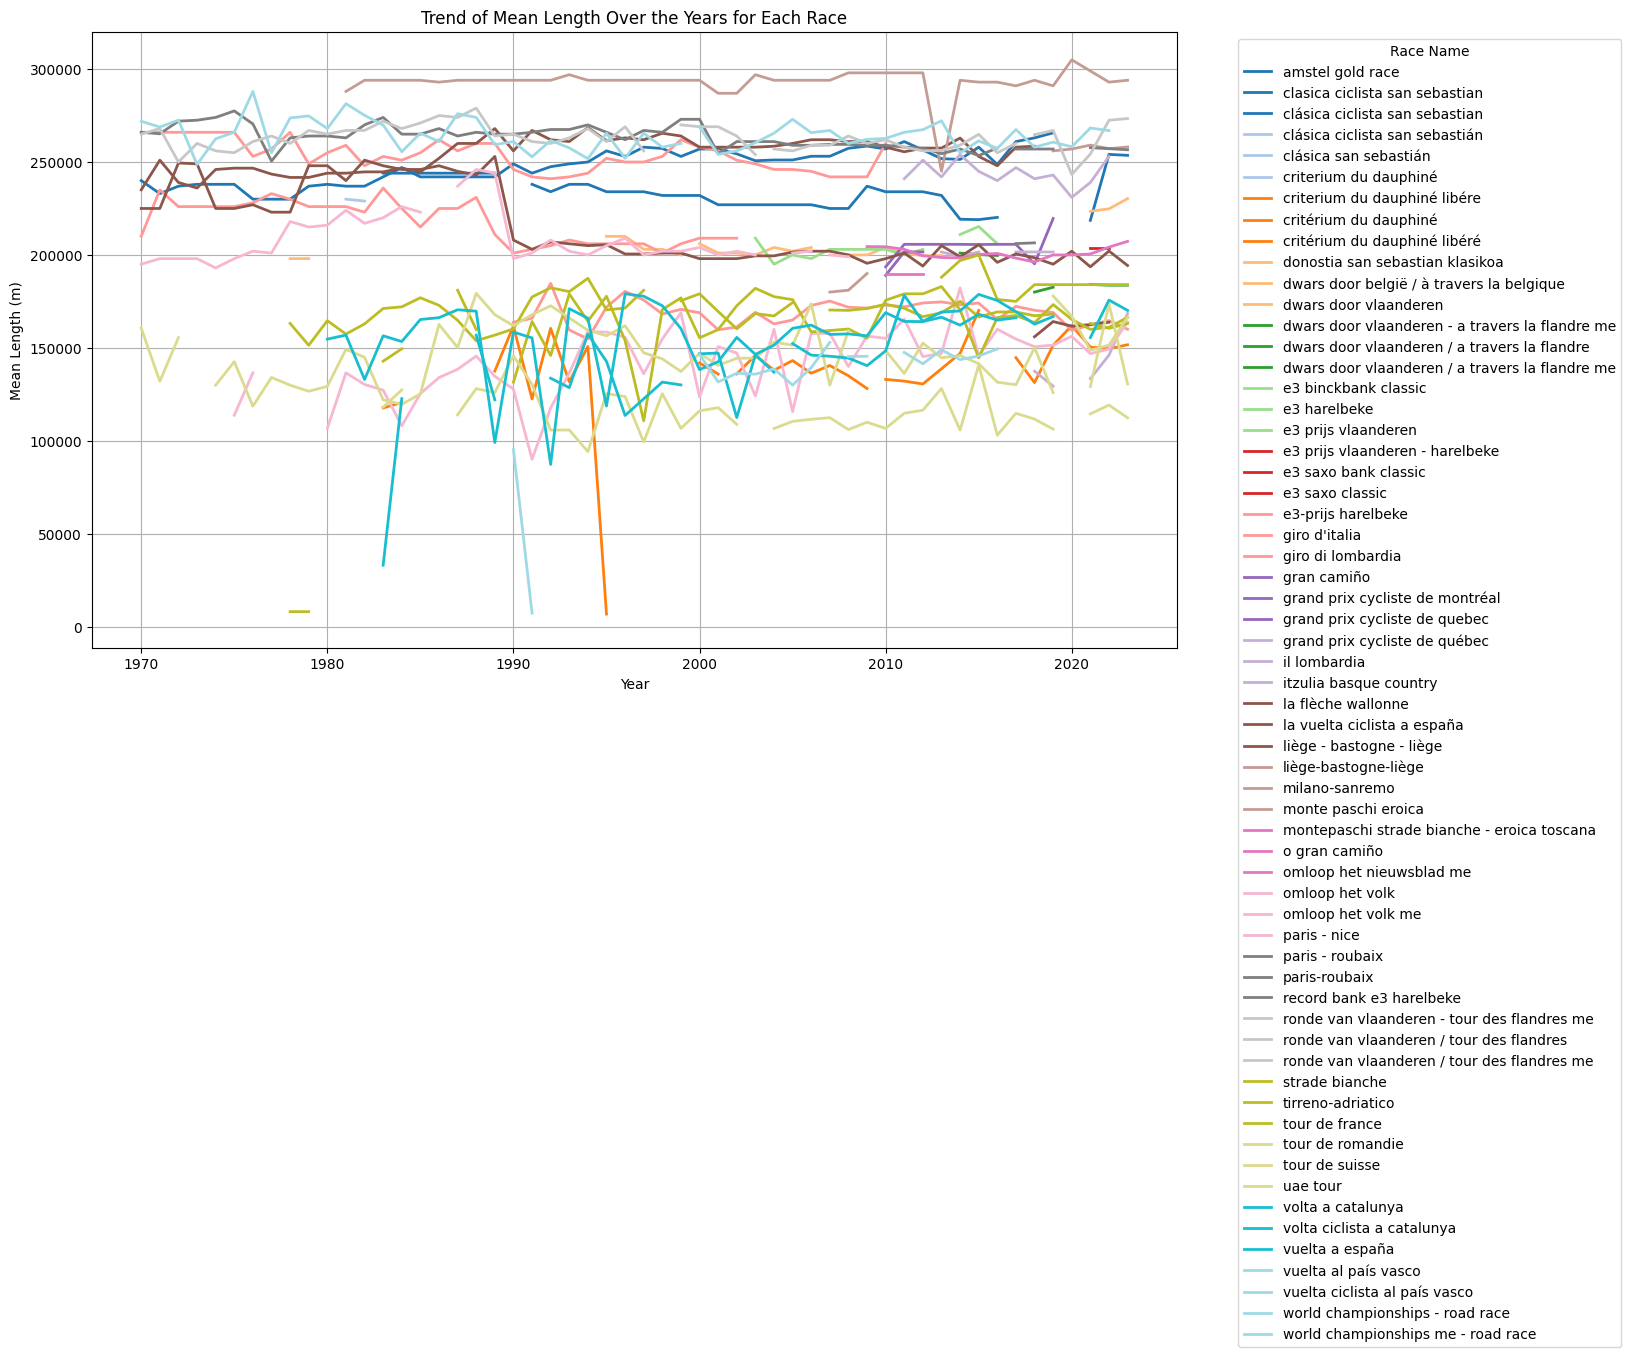

In [134]:
# Calculate the mean length for each race name per year
copy_races = races_df[races_df['length'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year
mean_length_per_name_year = copy_races.groupby(['year', 'name'])['length'].mean().unstack()

# Plot the trend of mean length over the years for each race name
plt.figure(figsize=(14, 8))
mean_length_per_name_year.plot(kind='line', ax=plt.gca(), colormap='tab20', linewidth=2)
plt.title('Trend of Mean Length Over the Years for Each Race')
plt.xlabel('Year')
plt.ylabel('Mean Length (m)')
plt.legend(title='Race Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### mean **Climb Length** group by **race name** trend

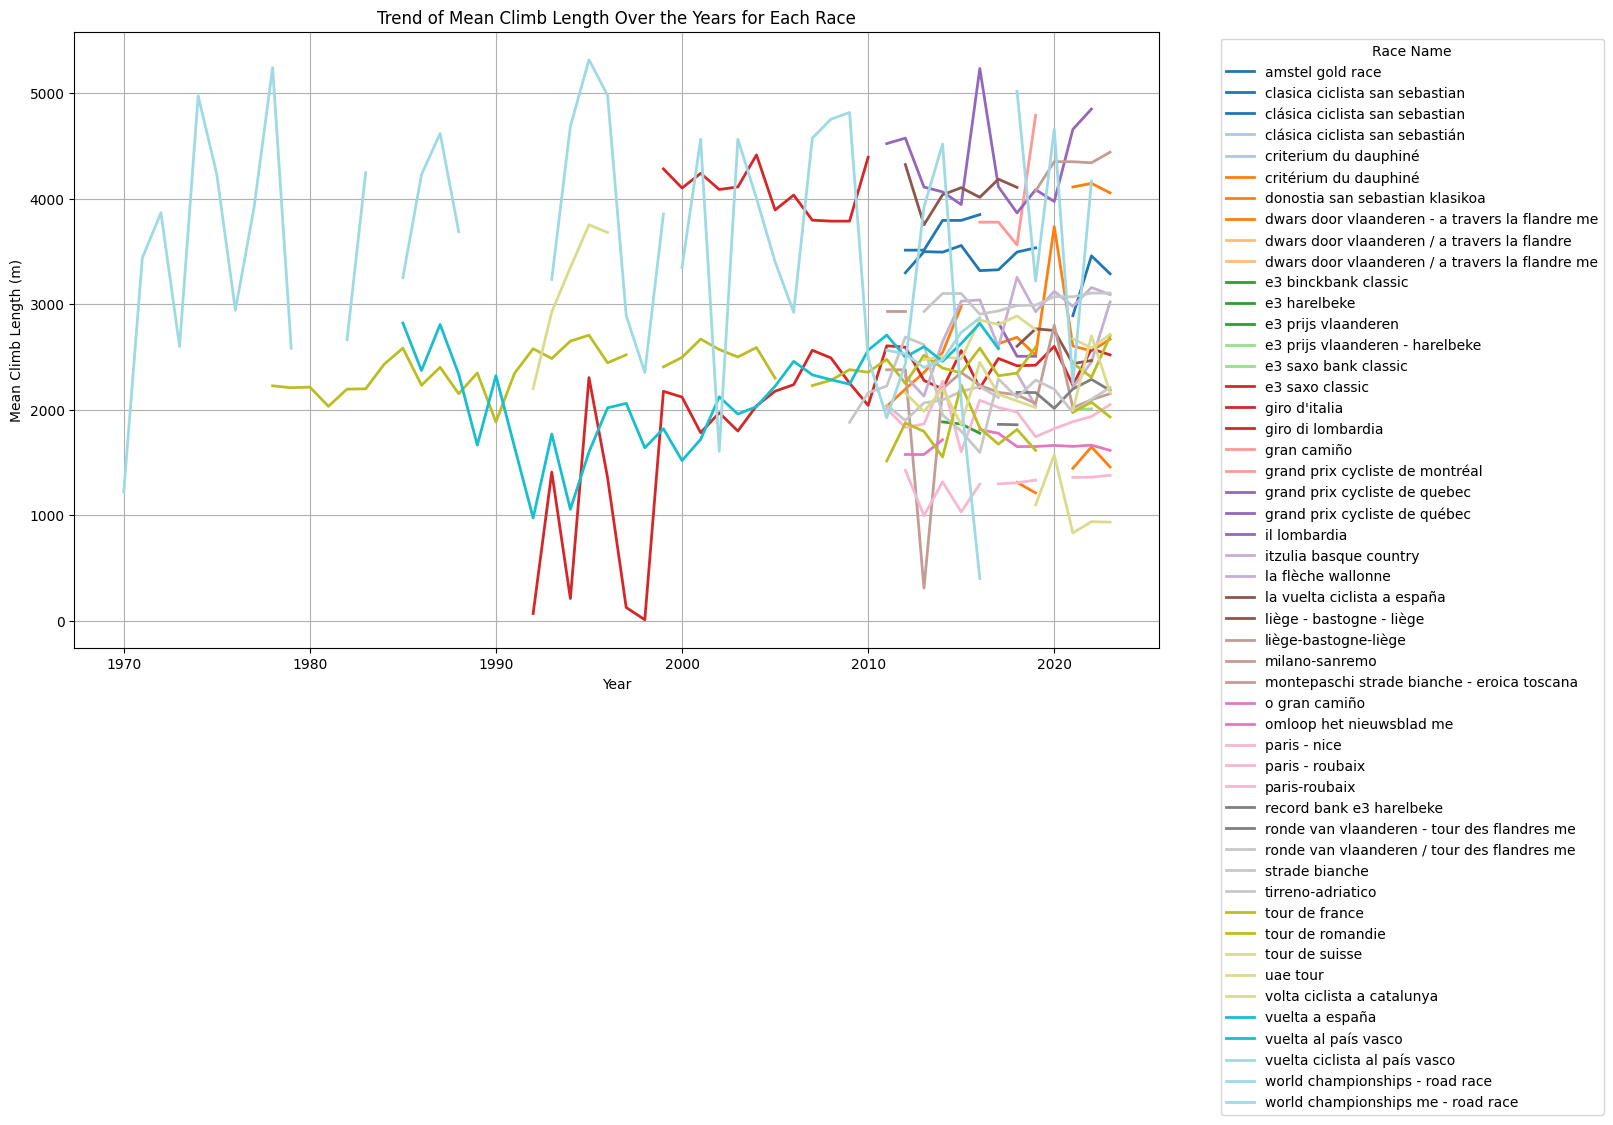

In [135]:
# Calculate the mean length for each race name per year
copy_races = races_df[races_df['climb_total'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year
mean_climb_length_per_name_year = copy_races.groupby(['year', 'name'])['climb_total'].mean().unstack()

# Plot the trend of mean length over the years for each race name
plt.figure(figsize=(14, 8))
mean_climb_length_per_name_year.plot(kind='line', ax=plt.gca(), colormap='tab20', linewidth=2)
plt.title('Trend of Mean Climb Length Over the Years for Each Race')
plt.xlabel('Year')
plt.ylabel('Mean Climb Length (m)')
plt.legend(title='Race Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### **Profile** display

<Axes: xlabel='profile'>

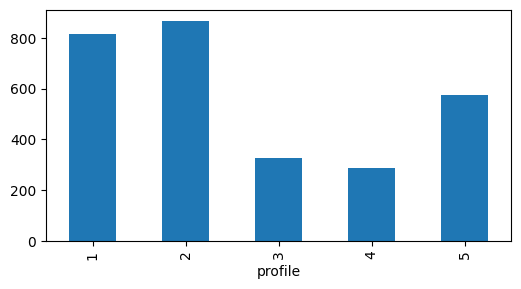

In [136]:
# Count the number of distinct races for each profile value
copy_races = races_df[races_df['profile'].notnull()].copy()
races_per_profile = copy_races.groupby('profile')['_url'].nunique()
races_per_profile.plot(kind='bar', figsize=(6, 3))

#### **Type of Road** display

The resulting graph shows that among the 3 attributes, only [is_tarmac] has positive values, and occupies the most of its records. Therefore, we decided to **drop** these fields for they do not provide any useful info

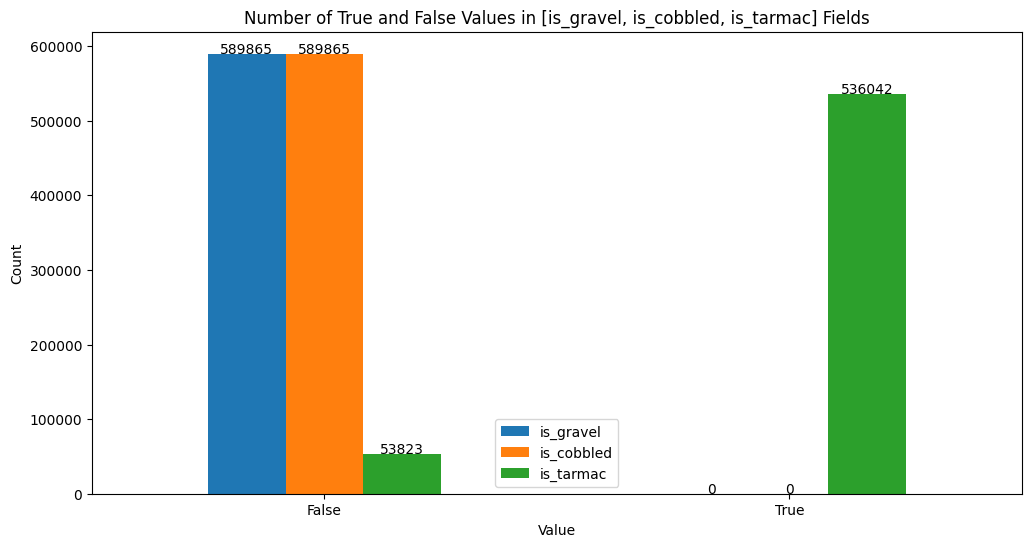

In [137]:
# Count the number of occurences of 'True' and 'False' in each road type
gravel_counts = races_df['is_gravel'].value_counts()
cobbled_counts = races_df['is_cobbled'].value_counts()
tarmac_counts = races_df['is_tarmac'].value_counts()

# Combine the counts into a single DataFrame
road_type = pd.DataFrame({
    'is_gravel': gravel_counts,
    'is_cobbled': cobbled_counts,
    'is_tarmac': tarmac_counts
})

road_type.plot(kind='bar', figsize=(12, 6))
plt.title('Number of True and False Values in [is_gravel, is_cobbled, is_tarmac] Fields')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height().astype('int64')}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [138]:
races_df = races_df.drop(['is_tarmac', 'is_cobbled', 'is_gravel'], axis=1)

#### **Cyclist Age** distribution over the year

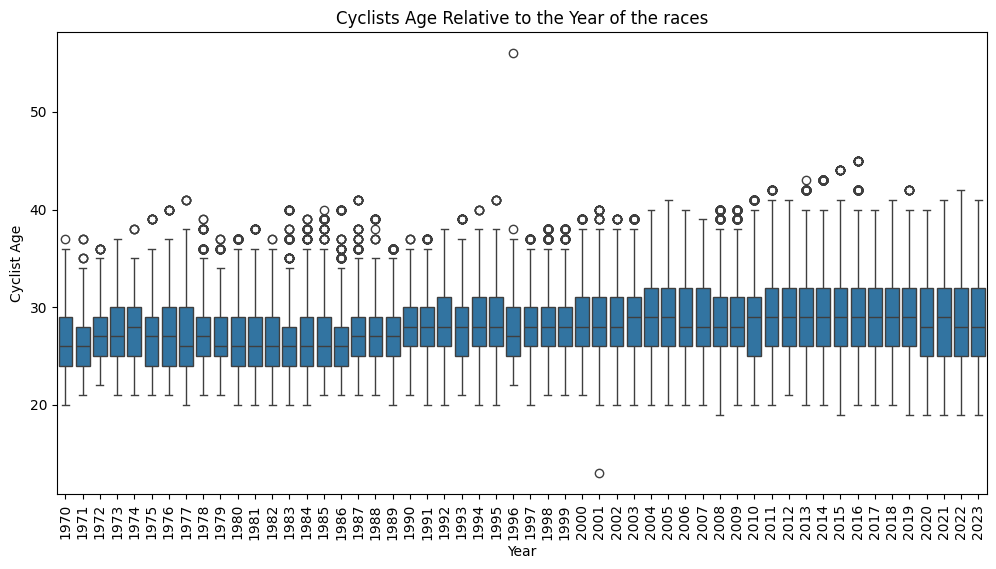

In [139]:
copy_races = races_df[races_df['cyclist_age'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='cyclist_age', data=copy_races)
plt.title('Cyclists Age Relative to the Year of the races')
plt.xlabel('Year')
plt.ylabel('Cyclist Age')
plt.xticks(rotation=90)
plt.show()

#### **Number of competing cyclists** trend

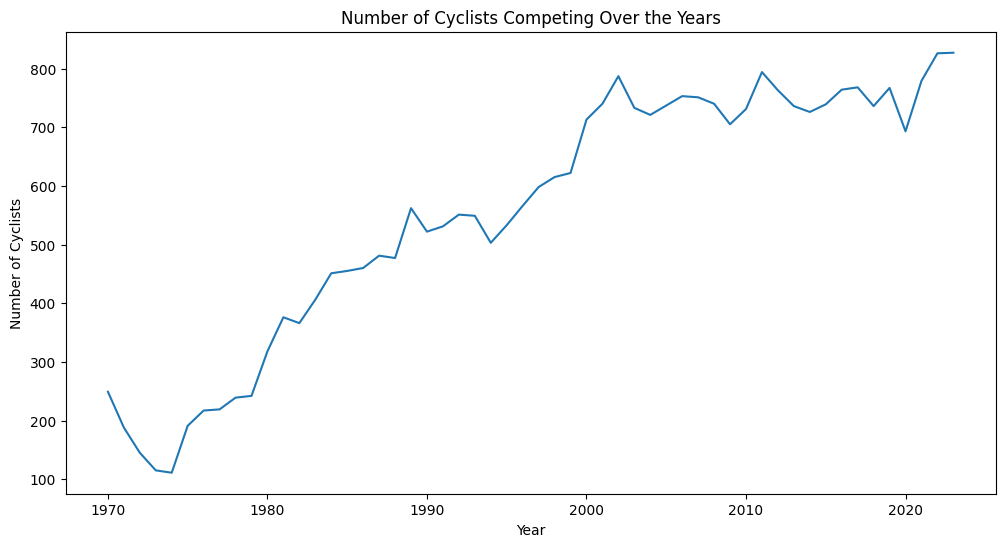

In [140]:
# Count the number of cyclists racing in each year
copy_races = races_df.copy()
copy_races['year'] = copy_races['day'].dt.year
cyclists_per_year = copy_races.groupby('year')['cyclist'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cyclists_per_year.index, y=cyclists_per_year.values)
plt.title('Number of Cyclists Competing Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cyclists')
plt.show()

#### **Number of Races** trend

We notice that in 2020 there is a sudden drop in number of races, this is due to the covid pandemic

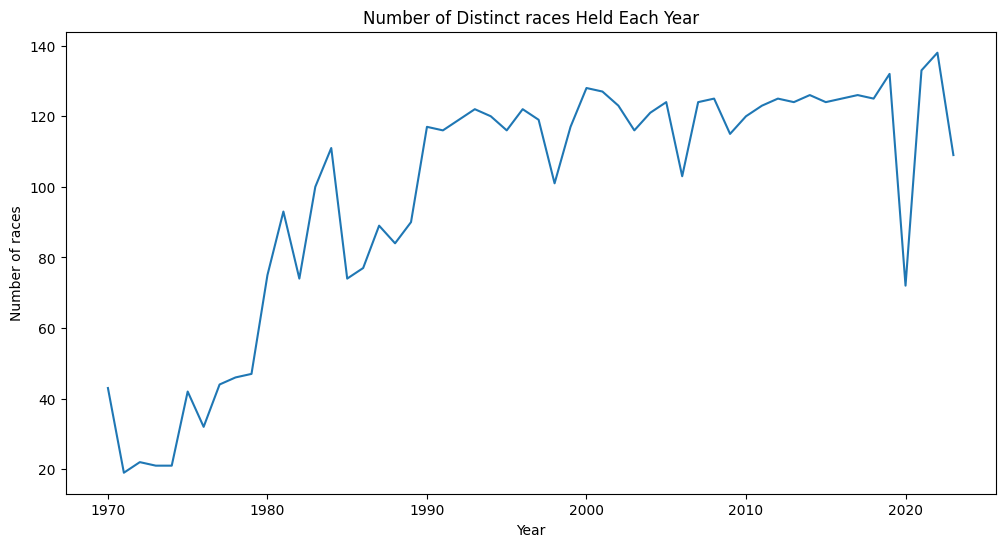

In [141]:
# Count the number of races in each year
copy_races = races_df.copy()
copy_races['year'] = copy_races['day'].dt.year
races_per_year = copy_races.groupby('year')['_url'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_year.index, y=races_per_year.values)
plt.title('Number of Distinct races Held Each Year')
plt.xlabel('Year')
plt.ylabel('Number of races')
plt.show()

# Fixing Missing Values

### **CYCLIST** dataframe

In [142]:
# create a copy to be used later for comapring the results
cyclists_df_before_filling_missing_values = cyclists_df.copy()

# Display missing values in the dataset
display_missing_values(df=cyclists_df, df_name='Cyclists Dataset')

Number of missing values and their percentage in Cyclists Dataset:

             Missing Values  Percentage
_url                      0        0.00
name                      0        0.00
birth_year               13        0.21
weight                 3056       49.82
height                 2991       48.76
nationality               1        0.02


#### **MANUAL FIXING**

We manually searched and found some missing information on certain cyclist

In [143]:
missing_cyclists = cyclists_df[cyclists_df.isnull().any(axis=1)]

for row in missing_cyclists.iterrows():
    if row[1]['birth_year'] is pd.NA:
        print(row)

'''Font
https://www.procyclingstats.com/rider/antonio-zanini
https://www.procyclingstats.com/rider/vladimir-malakov
https://www.wikiwand.com/en/articles/Scott_Davies_(cyclist)
'''
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', ['nationality', 'height', 'weight', 'birth_year']] = ['great britain', 184, 66, 1995]
cyclists_df.loc[cyclists_df['_url'] == 'vladimir-malakov', ['birth_year']] = [1958]
cyclists_df.loc[cyclists_df['_url'] == 'antonio-zanini', ['birth_year']] = [1965]

(9, _url            scott-davies
name           scott  davies
birth_year              <NA>
weight                  <NA>
height                  <NA>
nationality             <NA>
Name: 9, dtype: object)
(601, _url            vladimir-malakov
name           vladimir  malakov
birth_year                  <NA>
weight                      <NA>
height                      <NA>
nationality               russia
Name: 601, dtype: object)
(894, _url            antonio-zanini
name           antonio  zanini
birth_year                <NA>
weight                    <NA>
height                    <NA>
nationality              italy
Name: 894, dtype: object)
(2408, _url            filippo-simonetti
name           filippo  simonetti
birth_year                   <NA>
weight                       <NA>
height                       <NA>
nationality                 italy
Name: 2408, dtype: object)
(2515, _url            carlos-garcia
name           carlos  garcía
birth_year               <NA>
weight         

#### **Birth Year** fixing

There are 10 records left with missing [birth_year] value after manual searching, we decided to fill such records as such:
1. look for the 1st race that cyclist participated in races_df
2. get the mode on the age of cyclists of that year
3. reverse calculate the [birth_year] of the cyclist by subtrackting [year] - [mode_age]

In [144]:
missing_cyclists = cyclists_df[cyclists_df['birth_year'].isnull()]

for idx, row in missing_cyclists.iterrows():
    cyclist_url = row['_url']
    cyclist_races = races_df[races_df['cyclist'] == cyclist_url]
    
    if not cyclist_races.empty:
        first_race = cyclist_races.iloc[0]
        race_year = first_race['day'].year
        mode_age = races_df[races_df['day'].dt.year == race_year]['cyclist_age'].mode()[0]
        estimated_birth_year = race_year - mode_age
        
        cyclists_df.loc[cyclists_df['_url'] == cyclist_url, 'birth_year'] = estimated_birth_year

#### **Height** & **Weight** fixing

To fill the missing values for weight and height while maintaining a normal distribution:
- For missing heights: Fill in with a random value taken from individuals of the same nationality and within a weight range of ±3 kg. If weight is also missing, fill in with a random height taken from individuals of the same nationality.
- For missing weights: Fill in with a random value taken from individuals of the same nationality and within a height range of ±3 cm.

- If there is no value found in the range, we fill with a value from the entire dataset (not only from the same nation).
- For countries with less than 10 individuals, we also use the entire dataset to fill in the missing values.

##### **Height** fixing

In [145]:
nationality_counts = cyclists_df['nationality'].value_counts()

# Fill missing heights
for idx, row in cyclists_df[cyclists_df['height'].isnull()].iterrows():
    nationality = row['nationality']
    weight = row['weight']
    
    if nationality_counts.get(nationality, 0) < 50:
        # Use entire dataset
        candidates = cyclists_df[cyclists_df['height'].notnull()]
    elif pd.notnull(weight):
        # Find candidates with same nationality and weight within ±3 kg
        candidates = cyclists_df[
            (cyclists_df['nationality'] == nationality) &
            (cyclists_df['weight'].between(weight - 3, weight + 3)) &
            (cyclists_df['height'].notnull())
        ]
    else:
        # Weight is missing, find candidates with same nationality
        candidates = cyclists_df[
            (cyclists_df['nationality'] == nationality) &
            (cyclists_df['height'].notnull())
        ]
    # Fill from entire dataset
    if candidates.empty:
        candidates = cyclists_df[cyclists_df['height'].notnull()]
    # Randomly select a height from candidates
    if not candidates.empty:
        cyclists_df.at[idx, 'height'] = candidates['height'].sample(n=1).values[0]

##### **Weight** fixing

In [146]:
# Fill missing weights
for idx, row in cyclists_df[cyclists_df['weight'].isnull()].iterrows():
    nationality = row['nationality']
    height = row['height']
    
    if nationality_counts.get(nationality, 0) < 50:
        # Use entire dataset
        candidates = cyclists_df[cyclists_df['weight'].notnull()]
    elif pd.notnull(height):
        # Find candidates with same nationality and height within ±3 cm
        candidates = cyclists_df[
            (cyclists_df['nationality'] == nationality) &
            (cyclists_df['height'].between(height - 3, height + 3)) &
            (cyclists_df['weight'].notnull())
        ]
    else:
        # Height is missing, find candidates with same nationality
        candidates = cyclists_df[
            (cyclists_df['nationality'] == nationality) &
            (cyclists_df['weight'].notnull())
        ]
    # Fill from entire dataset
    if candidates.empty:
        candidates = cyclists_df[cyclists_df['weight'].notnull()]
    # Randomly select a weight from candidates
    if not candidates.empty:
        cyclists_df.at[idx, 'weight'] = candidates['weight'].sample(n=1).values[0]

##### **Check** 

In [147]:
print("Records with missing height:")
cyclists_df[cyclists_df['height'].isnull()]

Records with missing height:


,_url,name,birth_year,weight,height,nationality


In [148]:
print("\nRecords with missing weight:")
cyclists_df[cyclists_df['weight'].isnull()]


Records with missing weight:


,_url,name,birth_year,weight,height,nationality


#### Cyclists dataframe AFTER fixing

In [149]:
display_missing_values(df=cyclists_df, df_name='Cyclists Dataset')

Number of missing values and their percentage in Cyclists Dataset:

             Missing Values  Percentage
_url                      0         0.0
name                      0         0.0
birth_year                0         0.0
weight                    0         0.0
height                    0         0.0
nationality               0         0.0


### **RACES** dataframe

In [150]:
# create a copy to be used later for comapring the results
races_df_before_filling_missing_values = races_df.copy()

# Display missing values in the dataset
display_missing_values(df=races_df, df_name='Cyclists Dataset')

Number of missing values and their percentage in Cyclists Dataset:

                   Missing Values  Percentage
_url                            0        0.00
name                            0        0.00
points                        477        0.08
uci_points                 338779       57.43
length                          0        0.00
climb_total                147045       24.93
profile                    148194       25.12
startlist_quality               0        0.00
position                        0        0.00
cyclist                         0        0.00
cyclist_age                   113        0.02
cyclist_team               159161       26.98
delta                           0        0.00
day                             0        0.00


#### **Points** fixing

Since there are only a small percentage of missing value on such field, we decided to fill them using the mean of the existing values of the same race stages of the same year 

In [151]:
copy_races = races_df.copy()
copy_races['year'] = copy_races['day'].dt.year
mean_points_per_race_year = copy_races.groupby(['name', 'year'])['points'].transform('mean')

copy_races['points'] = copy_races['points'].fillna(mean_points_per_race_year)

races_df.update(copy_races)

#### **UCI Points** fix

We first try to understand its relationship with other numeric attributes in the dataframe <br>
We discover that the [uci_points] is highly related to [points] (85%), we also discover (by observating its distribution in the previous paragraph) that the records having this value are races of year 2000 and forward <br>
Given the redundance with [points] and its relatively new use, we decided to drop it from our future analysis

In [152]:
# Correlation of 'points' with other numeric columns
numeric_columns = races_df.select_dtypes(include=['number']).columns
correlation_with_points = races_df[numeric_columns].corr()['uci_points'].sort_values(ascending=False)
correlation_with_points

uci_points           1.000000
points               0.856051
length               0.261808
climb_total          0.091693
delta                0.018881
cyclist_age         -0.004159
startlist_quality   -0.014024
profile             -0.071257
position            -0.083119
Name: uci_points, dtype: float64

In [153]:
races_df = races_df.drop(['uci_points'], axis=1)

#### **Cyclist Team** fix

We simply define a default value for all the missing values

In [154]:
races_df['cyclist_team'] = races_df['cyclist_team'].fillna('unknown')

#### **Cyclist Age** fix

We estimated the cyclists age in the cyclists_df, we can now simply calculate the missing values

In [155]:
for idx, row in races_df[races_df['cyclist_age'].isnull()].iterrows():
    cyclist_url = row['cyclist']
    race_year = row['day'].year
    birth_year = cyclists_df[cyclists_df['_url'] == cyclist_url]['birth_year'].values[0]
    
    if pd.notnull(birth_year):
        estimated_age = race_year - birth_year
        races_df.at[idx, 'cyclist_age'] = estimated_age

#### **Climb Total** fix

Since the field represents the part of race that is run on inclined surface, we can simply assume that the missing values represent 0, i.e. the course was run on flat surface

In [156]:
races_df['climb_total'] = races_df['climb_total'].fillna(0)

#### **Profile** fix

We first try to understand the correlation of [profile] with other numeric fields. By using all 3 available methods, we discover that the attribute is moderatly related to [climb_total]<br>
But, after studying the races databse from credible sources, we discovered that not all races are assigned a specific difficulty level, and since we don't have all the variables to calculate and assign such attribute, it is unwise to assign the missing values randomly<br>
Therefore, we decided to drop this field
<br><br> **font**: 
- https://www.procyclingstats.com/calendar/uci/stages-database
- https://www.procyclingstats.com/info/profile-score-explained

{'pearson': profile              1.000000
 climb_total          0.654355
 delta                0.360759
 length               0.088873
 cyclist_age          0.008603
 position            -0.025425
 startlist_quality   -0.087865
 points              -0.106274
 Name: profile, dtype: float64,
 'spearman': profile              1.000000
 climb_total          0.651216
 delta                0.547277
 length               0.030906
 cyclist_age          0.007371
 position            -0.024964
 points              -0.119985
 startlist_quality   -0.126398
 Name: profile, dtype: float64,
 'kendall': profile              1.000000
 climb_total          0.513408
 delta                0.420183
 length               0.017441
 cyclist_age          0.005602
 position            -0.018424
 startlist_quality   -0.092412
 points              -0.097188
 Name: profile, dtype: float64}

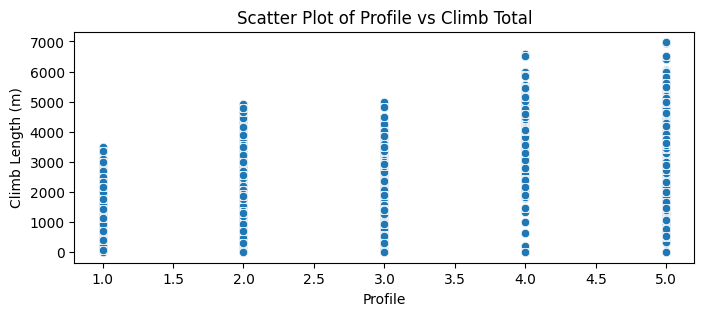

In [157]:
# Correlation of 'profile' with other numeric columns using different methods
numeric_columns = races_df.select_dtypes(include=['number']).columns
correlation_methods = ['pearson', 'spearman', 'kendall']
correlations = {}

for method in correlation_methods:
    correlations[method] = races_df[numeric_columns].corr(method=method)['profile'].sort_values(ascending=False)

plt.figure(figsize=(8, 3))
sns.scatterplot(x='profile', y = 'climb_total', data=races_df)
plt.title('Scatter Plot of Profile vs Climb Total')
plt.xlabel('Profile')
plt.ylabel('Climb Length (m)')
correlations

In [158]:
races_df = races_df.drop(['profile'], axis=1)

#### Races dataframe AFTER fixing

In [159]:
display_missing_values(df=races_df, df_name='Cyclists Dataset')

Number of missing values and their percentage in Cyclists Dataset:

                   Missing Values  Percentage
_url                            0         0.0
name                            0         0.0
points                          0         0.0
length                          0         0.0
climb_total                     0         0.0
startlist_quality               0         0.0
position                        0         0.0
cyclist                         0         0.0
cyclist_age                     0         0.0
cyclist_team                    0         0.0
delta                           0         0.0
day                             0         0.0


# Data Cleaning & Outlier Detection

### **CYCLIST** dataframe

In [160]:
cyclists_df.describe()

,birth_year,weight,height
count,6134.0,6134.0,6134.0
mean,1974.058689,68.472612,179.601565
std,15.528123,6.206445,6.357062
min,1933.0,48.0,154.0
25%,1962.0,64.0,175.0
50%,1974.0,68.0,180.0
75%,1987.0,73.0,184.0
max,2004.0,94.0,204.0


#### **Height** cleaning

##### Height distribution Before/After *Comparison*

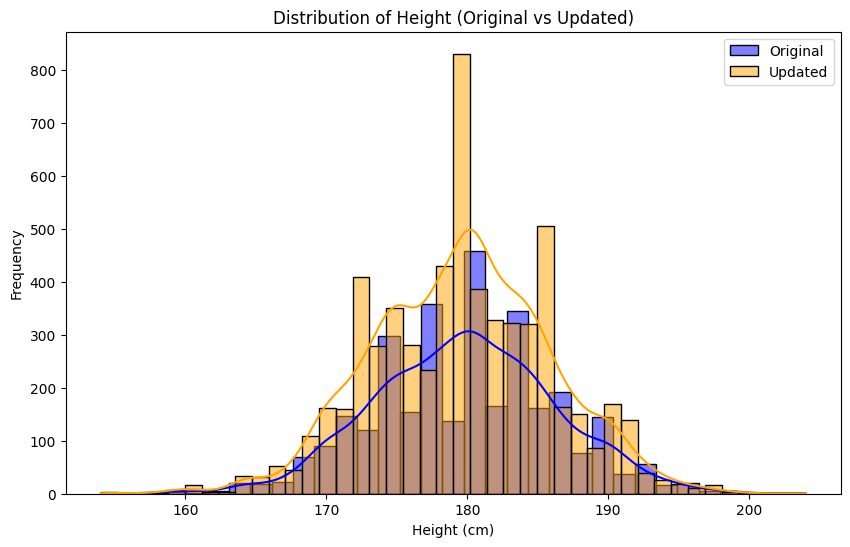

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df_before_filling_missing_values['height'], bins='scott', kde=True, color='blue', label='Original')
sns.histplot(cyclists_df['height'], bins='scott', kde=True, color='orange', label='Updated')
plt.title('Distribution of Height (Original vs Updated)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### *Outlier detection* on Height

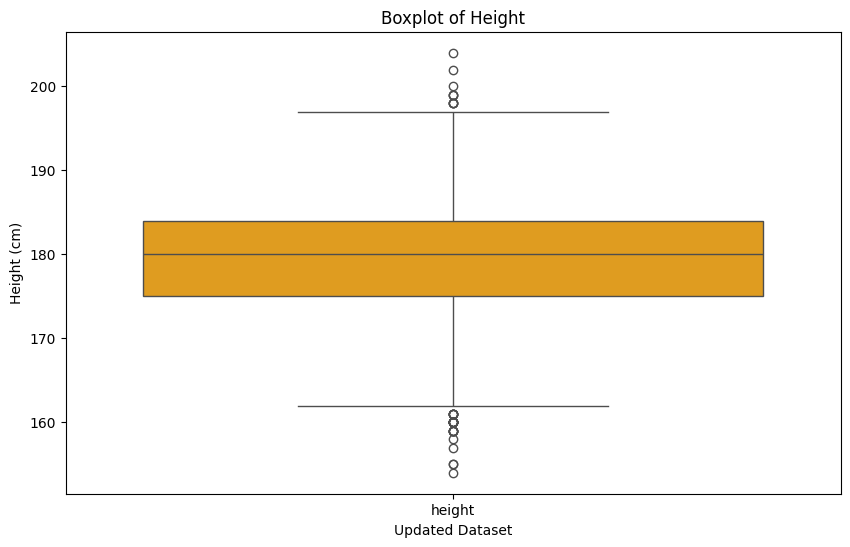

In [162]:
# Boxplot of height distribution after missing value handloing
plt.figure(figsize=(10, 6))
sns.boxplot(data=[ cyclists_df['height']], palette=['orange'])
plt.title('Boxplot of Height')
plt.xlabel('Updated Dataset')
plt.ylabel('Height (cm)')
plt.show()

Calculate and extract the ouliers

Since the attribute is simple in nature, and it has a more or less normal distribution, we can easily detect (extreme) outliers by using the Inter-quartiles

In [163]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cyclists_df['height'].quantile(0.25)
Q3 = cyclists_df['height'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_height = cyclists_df[(cyclists_df['height'] < lower_bound) | (cyclists_df['height'] > upper_bound)]

print(f"Outliers in height (tot numbe = {outliers_height['name'].count()}):")
print(outliers_height[['name', 'height']])

Outliers in height (tot numbe = 38):
                            name  height
292                 jens  mouris     198
522           stijn  vandenbergh     199
679                 conor  dunne     204
720               vicente  belda     154
840             samuel  dumoulin     159
845               michael  schär     198
954    freddy excelino  gonzález     160
969                jorge  ferrío     159
1136             augusto  triana     160
1312             peter  verbeken     155
1511              robert  forest     159
1535        josé luis  rodriguez     159
1579      abelardo antonio  ríos     161
1736        hector orlando  mesa     161
1818               alfons de bal     155
1964   jorge camilo  castiblanco     160
2437       heiner rodrigo  parra     160
2471                 daan  hoole     198
2720    mulu kinfe  hailemichael     158
3007              max  walscheid     199
3101             marcel  sieberg     198
3105  segundo leopoldo  chaparro     160
3152        ruber al

#### **Weight** cleaning

##### Weight distribution Before/After *Comparison*

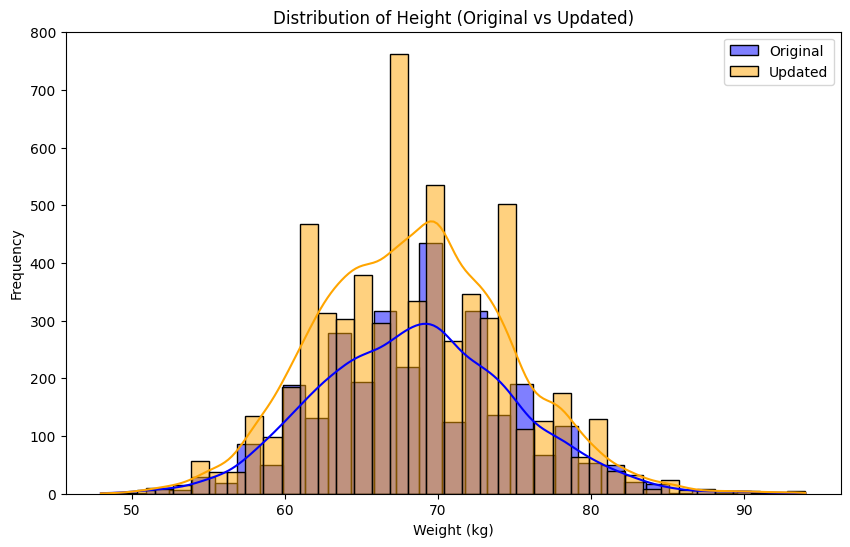

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df_before_filling_missing_values['weight'], bins='scott', kde=True, color='blue', label='Original')
sns.histplot(cyclists_df['weight'], bins='scott', kde=True, color='orange', label='Updated')
plt.title('Distribution of Height (Original vs Updated)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### *Outlier detection* on Height

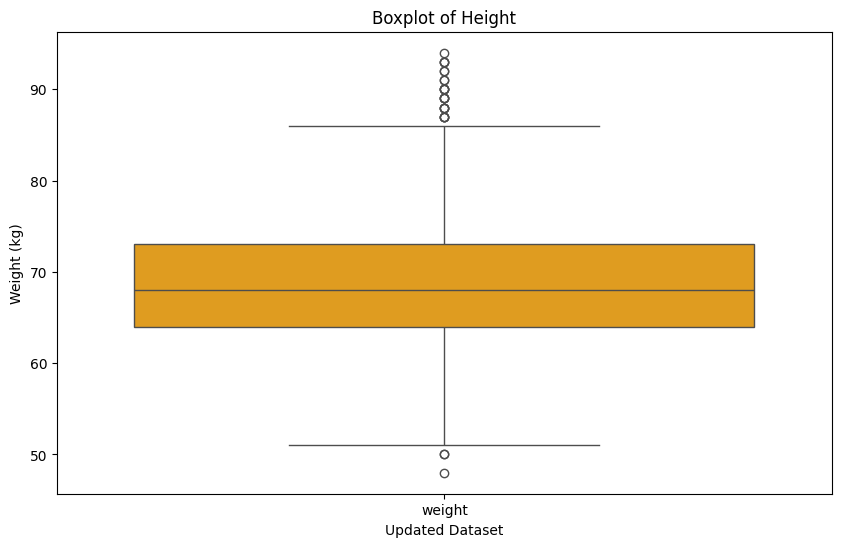

In [165]:
# Boxplot of height distribution after missing value handloing
plt.figure(figsize=(10, 6))
sns.boxplot(data=[ cyclists_df['weight']], palette=['orange'])
plt.title('Boxplot of Height')
plt.xlabel('Updated Dataset')
plt.ylabel('Weight (kg)')
plt.show()

calculate and extract outliners

We use the same method as [height] for [weight], because they have similar results

In [166]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cyclists_df['weight'].quantile(0.25)
Q3 = cyclists_df['weight'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_weight = cyclists_df[(cyclists_df['weight'] < lower_bound) | (cyclists_df['weight'] > upper_bound)]

print(f"Outliers in weight (tot numbe = {outliers_weight['name'].count()}):")
print(outliers_weight[['name', 'weight']])

Outliers in weight (tot numbe = 27):
                          name  weight
292               jens  mouris      91
348            jonas  rickaert      88
679               conor  dunne      88
857        jon ander  insausti      89
1332             kim  andersen      88
1375     josé humberto  rujano      48
1487            michael  kolář      90
1526            ben  janbroers      93
1985          marnix  cappelle      89
2720  mulu kinfe  hailemichael      50
3007            max  walscheid      90
3902                blaž  jarc      87
4110                eros  poli      87
4308          linas  balčiūnas      90
4554         gerrit  solleveld      93
4562    juan francisco  mouron      89
4690           alex  rasmussen      88
5015            clinton  avery      90
5066  guillaume van keirsbulck      89
5490        søren  wærenskjold      92
5495              jean  habets      93
5724              jaanus  kuum      92
5726          miguel  martinez      50
5758                rob  go

#### *Insights* on Height & Weight Outliers

We find out that there are some cyclists that are 'abnormal' in both height and in weight

In [167]:
set_outlier_height = set(outliers_height['name'])
set_outlier_weight = set(outliers_weight['name'])
same_cyclist = set_outlier_height.intersection(set_outlier_weight)

print(f"Outliers in both height and weight (tot numbe = {len(same_cyclist)}): \n")
print(cyclists_df[cyclists_df['name'].isin(same_cyclist)][['name', 'height', 'weight']])

Outliers in both height and weight (tot numbe = 4): 

                          name  height  weight
292               jens  mouris     198      91
679               conor  dunne     204      88
2720  mulu kinfe  hailemichael     158      50
3007            max  walscheid     199      90


#### **Cyclists** cleaning

We found out that there are some cyclists who are registered in the dataset but have never competed in a single race, they are not interesting to analyze, so we drop them

In [190]:
registered_cyclists = set(cyclists_df['_url'])
participating_cyclists = set(races_df['cyclist'])
non_participating_cyclists = registered_cyclists - participating_cyclists

if non_participating_cyclists:
    print("Cyclists who have not participated in any race:")
    print(cyclists_df[cyclists_df['_url'].isin(non_participating_cyclists)])
else:
    print("All registered cyclists have participated in at least one race.")

cyclists_df = cyclists_df.drop(cyclists_df[cyclists_df['_url'].isin(non_participating_cyclists)].index)
cyclists_df.info()

Cyclists who have not participated in any race:
                         _url                     name  birth_year  weight  \
6                willy-moonen            willy  moonen        1947      62   
30     jean-claude-theilliere  jean-claude  theillière        1944      64   
48           noel-vanclooster        noël  vanclooster        1943      75   
64                  theo-smit               theo  smit        1951      72   
70            jules-bruessing         jules  bruessing        1949      66   
...                       ...                      ...         ...     ...   
6052             roland-schar            roland  schär        1950      58   
6060     juan-santiago-zurano    juan santiago  zurano        1948      69   
6070         andres-gandarias        andrés  gandarias        1943      61   
6079        karl-heinz-kuster       karl-heinz  küster        1949      60   
6111  christian-de-buysschere  christian de buysschere        1950      63   

      height  n

We also need to check if there are any cyclists that have competed in a race but are not registered, but there are non that fits the description

In [169]:
non_registered_cyclists = participating_cyclists - registered_cyclists

if non_registered_cyclists:
    print("Cyclists who have participated in races but are not registered:")
    print(cyclists_df[cyclists_df['url_cyclist'].isin(non_registered_cyclists)])
else:
    print('\nAll cyclists are registered')


All cyclists are registered


### **RACES** dataframe

In [170]:
races_df.describe()

,points,length,climb_total,startlist_quality,position,cyclist_age,delta,day
count,589865.0,589865.0,589865.0,589865.000000,589865.000000,589865.0,589865.0,589865
mean,89.224757,166776.180584,1749.516208,1101.161178,74.219491,28.485609,418.292794,2006-08-11 17:59:28.544666880
min,18.0,1000.0,0.0,115.000000,0.000000,13.0,-6906.0,1970-02-28 00:00:00
25%,50.0,152500.0,3.0,844.000000,32.000000,26.0,10.0,1999-07-18 00:00:00
50%,80.0,178200.0,1671.0,988.000000,70.000000,28.0,156.0,2008-05-03 00:00:00
75%,100.0,203500.0,2863.0,1309.000000,112.000000,31.0,624.0,2015-08-29 00:00:00
max,350.0,338000.0,6974.0,2047.000000,209.000000,56.0,61547.0,2023-07-29 00:00:00
std,54.414098,64545.605664,1561.145156,380.586928,48.404023,3.85554,842.961596,NaN


#### **Points** cleaning

The resulting graphs show that the average points for each year before 1977 are unusually high, so we dropped races between 1970 and 1977, for they would disrupt the analysis of the dataset
<br>*(continue)*

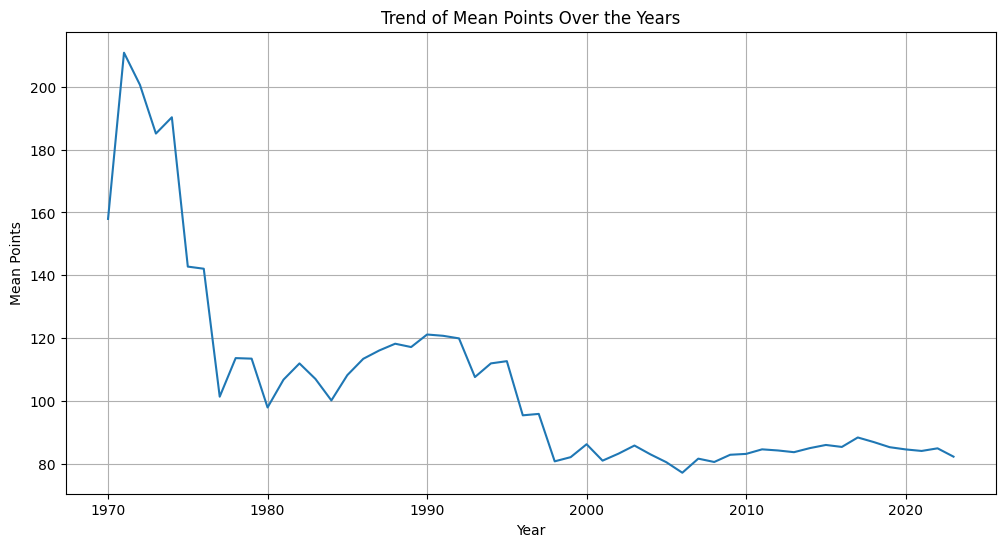

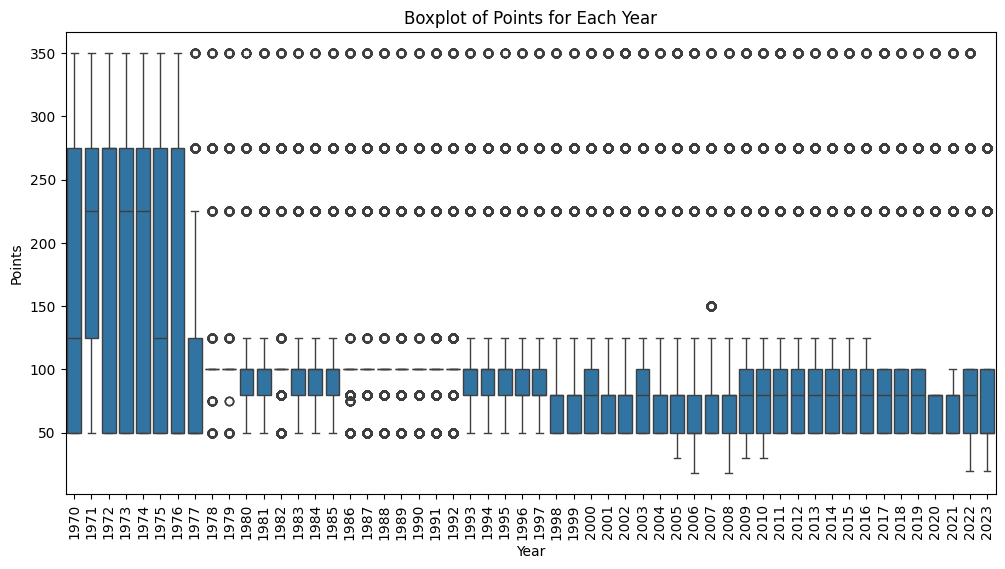

In [171]:
# Calculate the mean of 'points' for each year
copy_races = races_df[races_df['points'].notnull()].copy()
copy_races['year'] = copy_races['day'].dt.year
mean_points_per_year = copy_races.groupby('year')['points'].mean()

# Plot the trend of mean points over the years
plt.figure(figsize=(12, 6))
mean_points_per_year.plot(kind='line')
plt.title('Trend of Mean Points Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Points')
plt.grid(True)
plt.show()

# Boxplot of points for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='points', data=copy_races)
plt.title('Boxplot of Points for Each Year')
plt.xlabel('Year')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

# Drop records before year 1977
drop_points = copy_races[copy_races['year'] <= 1976]
copy_races = copy_races.drop(drop_points.index)

# Update the original dataframe
races_df = copy_races.copy()

##### Points of each different race over the year

C:\Users\zhuji\AppData\Local\Temp\ipykernel_16652\2808550848.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_races = grouped_races.apply(lambda x: x.drop_duplicates(subset=['_url'], keep='first')).reset_index(drop=True, level=['year', 'name'])


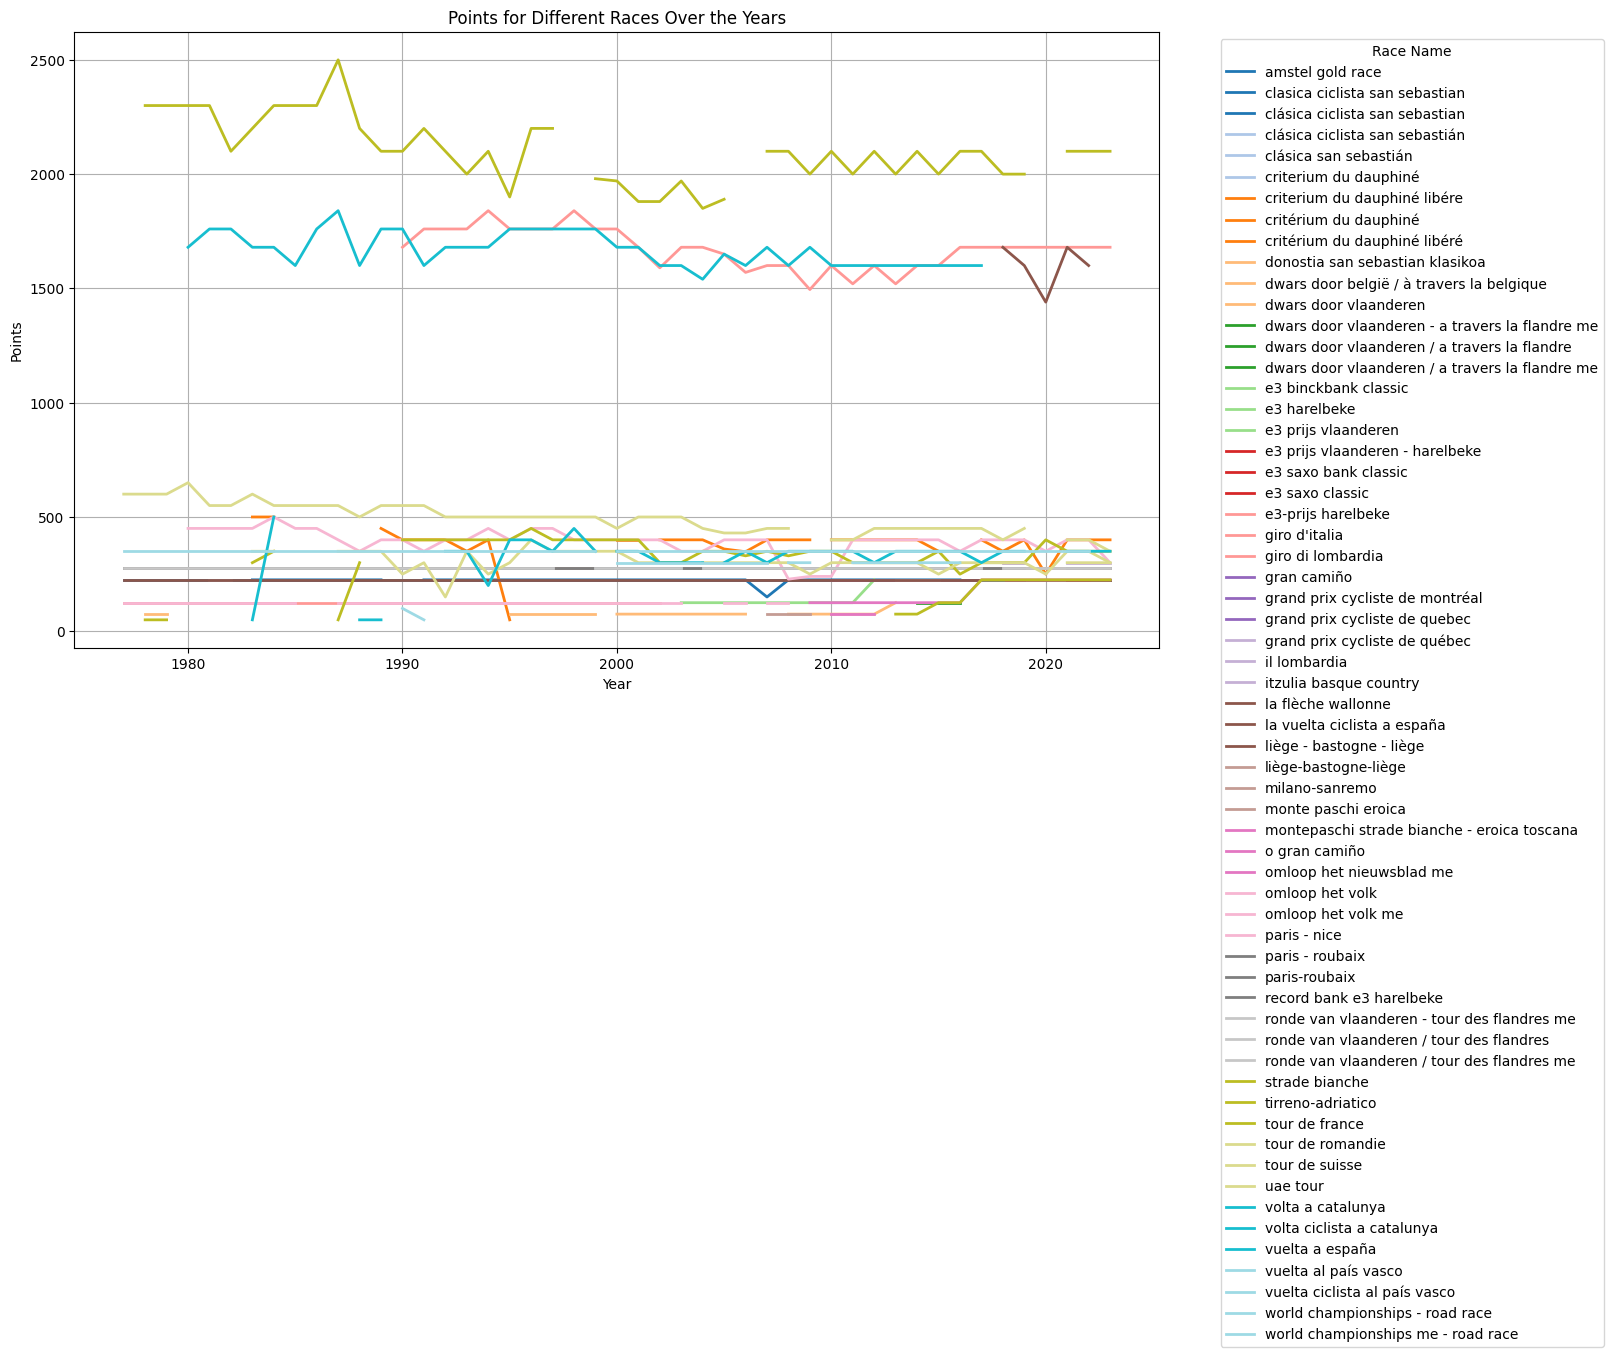

In [172]:
grouped_races = copy_races.groupby(['year', 'name'])

# Group by the subset by the _url and drop all the duplicates on _url
unique_races = grouped_races.apply(lambda x: x.drop_duplicates(subset=['_url'], keep='first')).reset_index(drop=True, level=['year', 'name'])

# Get the sum of points for each race in each year
sum_points = unique_races.groupby(['year', 'name'])['points'].sum().reset_index()

# Pivot the data to have years as rows and race names as columns
points_per_race_year = sum_points.pivot(index='year', columns='name', values='points')

# Plot the data
plt.figure(figsize=(14, 8))
points_per_race_year.plot(kind='line', ax=plt.gca(), colormap='tab20', linewidth=2)
plt.title('Points for Different Races Over the Years')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Race Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

*(continued)*
<br>Upon observing the graph above, we notice that there are some races with much higher [points] than others (over the year), so we divided the dataset into 2 subsets, one containing the high [points] races which are more prestigious, and another containing the rest

In [173]:
high_point_races = sum_points[sum_points['points'] > 1000]
low_point_races = sum_points[~(sum_points.index.isin(high_point_races.index))]

high_point_races_df = races_df[races_df['name'].isin(high_point_races['name'])]
low_point_races_df = races_df[races_df['name'].isin(low_point_races['name'])]

#### **Length** cleaning

C:\Users\zhuji\AppData\Local\Temp\ipykernel_16652\47730707.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_races = grouped_races.apply(lambda x: x.drop_duplicates(subset=['_url'], keep='first')).reset_index(drop=True, level=['year', 'name'])


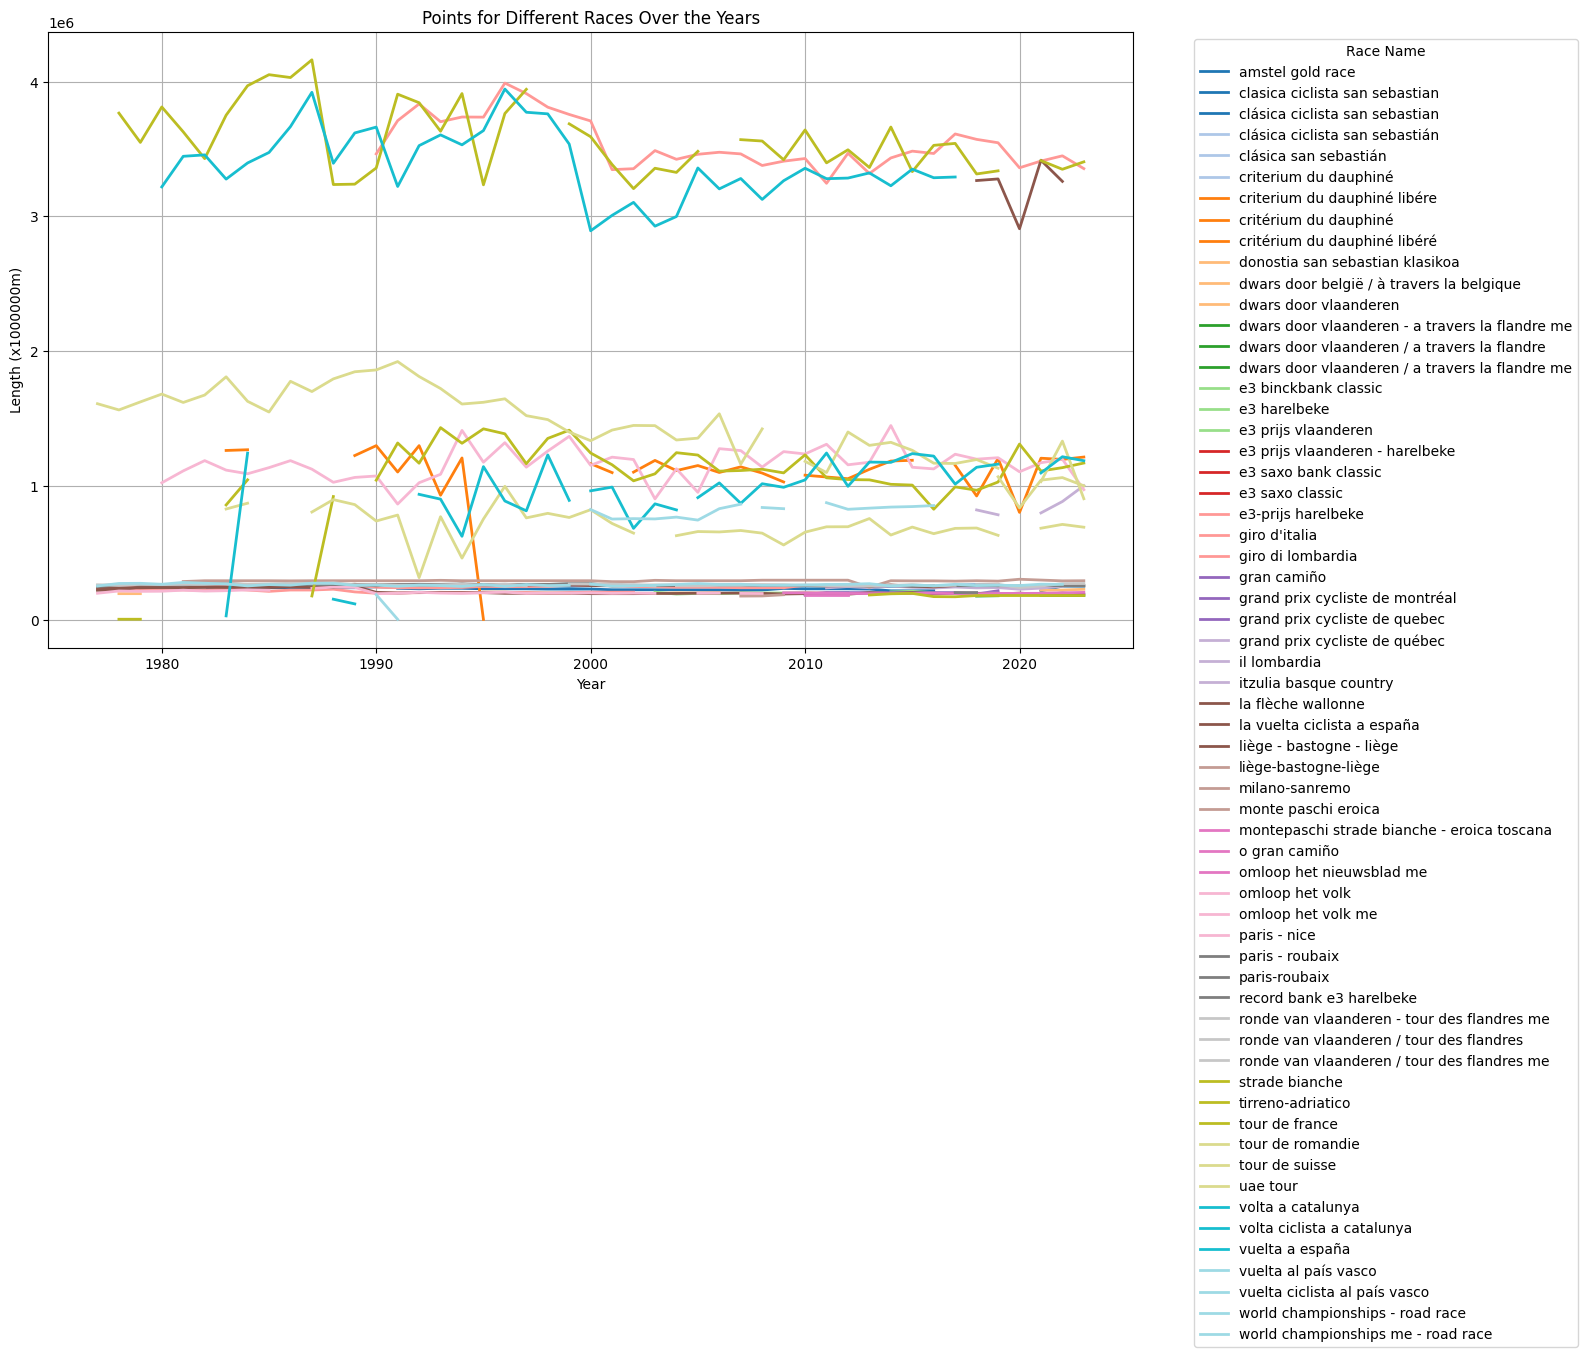

In [174]:
copy_races = races_df.copy()
copy_races['year'] = copy_races['day'].dt.year
grouped_races = copy_races.groupby(['year', 'name'])

# Group by the subset by the _url and drop all the duplicates on _url
unique_races = grouped_races.apply(lambda x: x.drop_duplicates(subset=['_url'], keep='first')).reset_index(drop=True, level=['year', 'name'])

# Get the sum of points for each race in each year
sum_length = unique_races.groupby(['year', 'name'])['length'].sum().reset_index()

# Pivot the data to have years as rows and race names as columns
length_per_race_year = sum_length.pivot(index='year', columns='name', values='length')

# Plot the data
plt.figure(figsize=(14, 8))
length_per_race_year.plot(kind='line', ax=plt.gca(), colormap='tab20', linewidth=2)
plt.title('Points for Different Races Over the Years')
plt.xlabel('Year')
plt.ylabel('Length (x1000000m)')
plt.legend(title='Race Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [175]:
high_length_races = sum_length[sum_length['length'] > 2000000]
low_length_races = sum_length[~(sum_length.index.isin(high_length_races.index))]

high_length_races_df = races_df[races_df['name'].isin(high_length_races['name'])]
low_length_races_df = races_df[races_df['name'].isin(low_length_races['name'])]

#### *Insight* on Points & Length

Upon comparing the graphs and subsequently tested using pd.equals function, we observe that the 2 created subsets are identical, meaning that the races with high points have also longer course length

In [176]:
if high_point_races_df.equals(high_length_races_df):
    print("The dataframes are identical.")
else:
    print("The dataframes are not identical.")

The dataframes are identical.


In [177]:
del (high_length_races_df)
del (low_length_races_df)
gc.collect()

99125

#### **Cyclist age** fix

Upon observing the graph, we noticed:
- a cyclist of age 13 at the time of the race, it is clearly an error, so it is removed
- a cyclist of age over 50 at the time of the race, for it is an extreme value, so it is removed

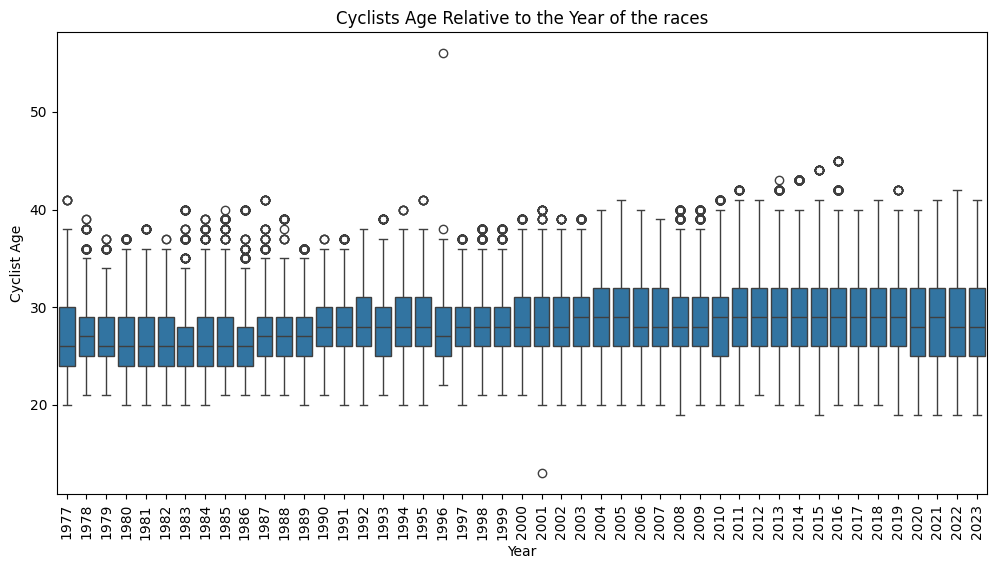

C:\Users\zhuji\AppData\Local\Temp\ipykernel_16652\1661713140.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_age = copy_races.groupby('year').apply(lambda x: x[(x['cyclist_age'] < lower_bound[x.name]) | (x['cyclist_age'] > upper_bound[x.name])])


In [178]:
copy_races = races_df.copy()
copy_races['year'] = copy_races['day'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='cyclist_age', data=copy_races)
plt.title('Cyclists Age Relative to the Year of the races')
plt.xlabel('Year')
plt.ylabel('Cyclist Age')
plt.xticks(rotation=90)
plt.show()

# Count the minor cyclists in each year and drop those records for they are clearly outliers error
error_age = copy_races[copy_races['cyclist_age'] < 18]
copy_races = copy_races.drop(error_age.index)

# Count the extreme age cyclists in each year and drop those records for they are extreme outliers
extreme_age = copy_races[copy_races['cyclist_age'] > 50]
copy_races = copy_races.drop(extreme_age.index)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each year
Q1 = copy_races.groupby('year')['cyclist_age'].quantile(0.25)
Q3 = copy_races.groupby('year')['cyclist_age'].quantile(0.75)

# Calculate the IQR (Interquartile Range) for each year
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers for each year
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers for each year
outliers_age = copy_races.groupby('year').apply(lambda x: x[(x['cyclist_age'] < lower_bound[x.name]) | (x['cyclist_age'] > upper_bound[x.name])])

extreme_age = copy_races[copy_races['cyclist_age'] > 50]
copy_races = copy_races.drop(extreme_age.index)

# Update the original dataframe
races_df = copy_races.copy()

#### **Delta** fix

We noticed negative delta values, but after studing these values and consulting credible sources, we discovered that it is possible to have negative delta values, for these races are a particular category called *ITT* - Individual Time Interval, in these case, the delta represents the time of arrive of each cyclist compared to their average arrival time, and negative value means such cyclist arrives later than his average<br>
Because the difficulty in identifying the *ITT* category, we decided to do nothing on this attribute


<br>font: https://www.procyclingstats.com/calendar/uci/stages-database

In [179]:
# Count the number of negative values in the delta column
negative_delta_count = races_df[races_df['delta'] < 0]
print(f"Number of negative values in delta: {negative_delta_count}")

Number of negative values in delta:                                  _url             name  points  length  \
70651   vuelta-a-espana/1992/stage-19  vuelta a españa      80   37900   
70652   vuelta-a-espana/1992/stage-19  vuelta a españa      80   37900   
70653   vuelta-a-espana/1992/stage-19  vuelta a españa      80   37900   
70654   vuelta-a-espana/1992/stage-19  vuelta a españa      80   37900   
70655   vuelta-a-espana/1992/stage-19  vuelta a españa      80   37900   
...                               ...              ...     ...     ...   
229670       paris-nice/1990/stage-7a     paris - nice      50  102000   
229671       paris-nice/1990/stage-7a     paris - nice      50  102000   
229672       paris-nice/1990/stage-7a     paris - nice      50  102000   
413492   tour-de-france/2003/stage-12   tour de france     100   47000   
520735    tour-de-suisse/1993/stage-4   tour de suisse      50  212300   

        climb_total  startlist_quality  position                   cyclist 

### **Correlation Matrix**

<Axes: >

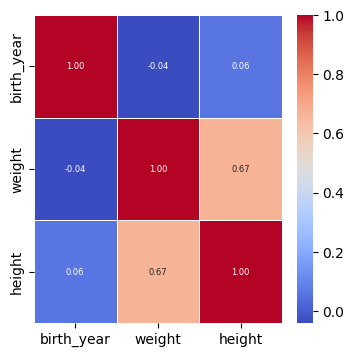

In [180]:
correlation_matrix = cyclists_df.select_dtypes(include='number').corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 6})

<Axes: >

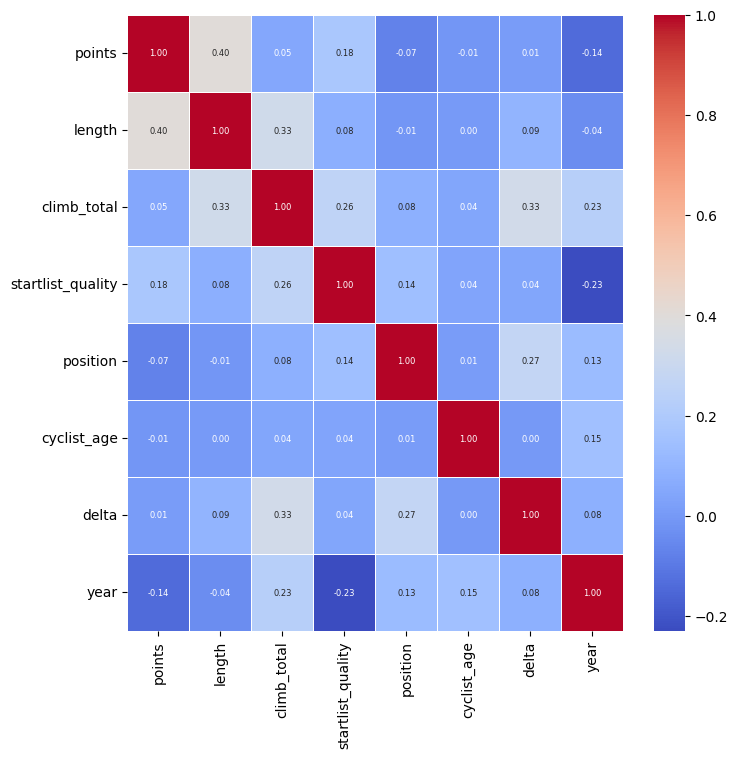

In [181]:
correlation_matrix = races_df.select_dtypes(include='number').corr(method='pearson')

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 6})

### New **Features**

#### **BMI**

In [182]:
def bmi_calculator(weight, height):
    height = height / 100
    bmi = weight / math.pow(height, 2)
    return round(bmi, 1)

# Calculate BMI
cyclists_df['bmi'] = cyclists_df.apply(
    lambda row: bmi_calculator(row['weight'], row['height']) 
    if pd.notna(row['weight']) and pd.notna(row['height']) 
    else pd.NA,
    axis=1
).astype('Float64', errors='ignore')

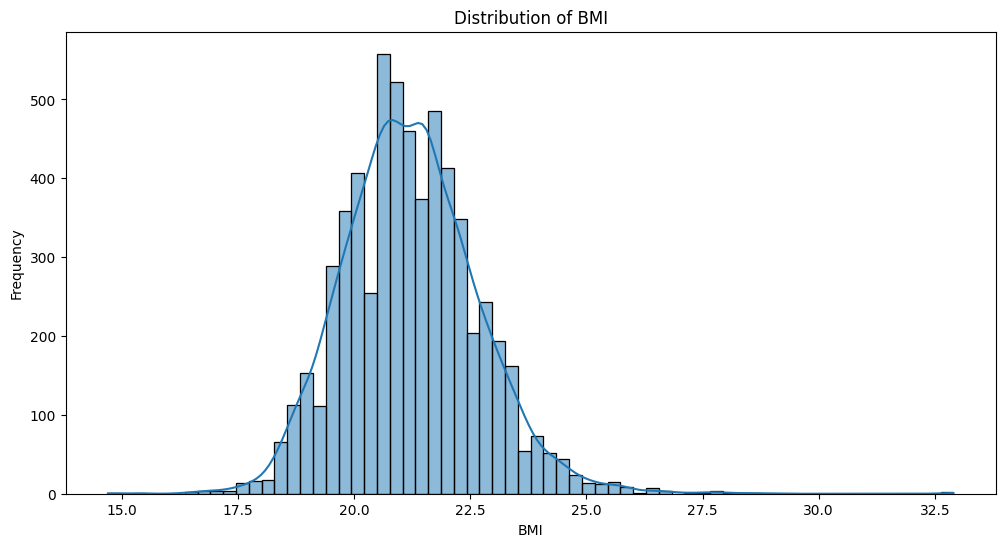

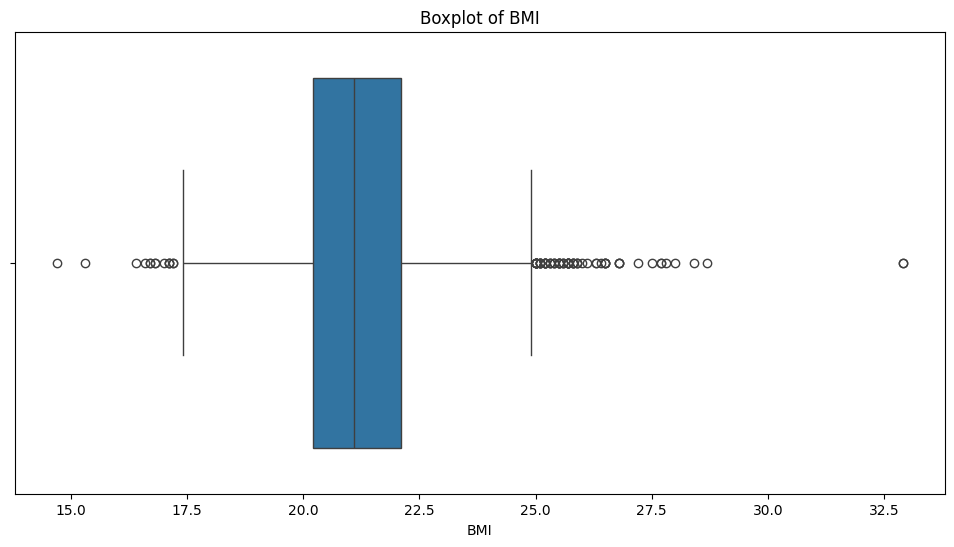

In [183]:
# Histogram of BMI
plt.figure(figsize=(12, 6))
sns.histplot(cyclists_df['bmi'], bins='scott', kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Boxplot of BMI
plt.figure(figsize=(12, 6))
sns.boxplot(x=cyclists_df['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

We categorize cyclists based on their BMI value

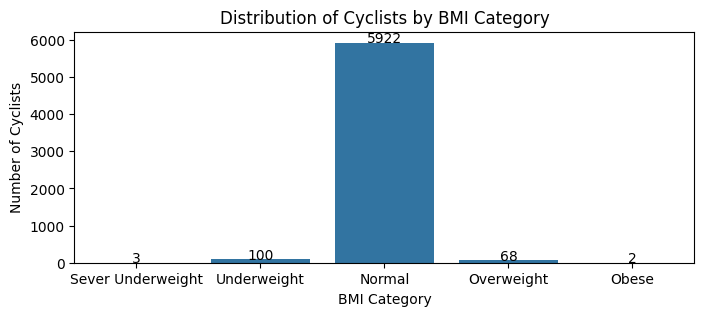

In [184]:
labels = ['Sever Underweight', 'Underweight', 'Normal', 'Overweight', 'Obese']

# Categorize cyclists based on their BMI
bmi_categories = pd.cut(cyclists_df['bmi'], bins=[0, 16.5, 18.5, 25, 30.1, float('inf')], labels=labels, right=False)
bmi_category_counts = bmi_categories.value_counts().reindex(labels, fill_value=0)

# Plot the distribution of BMI categories
plt.figure(figsize=(8, 3))
sns.countplot(x=bmi_categories, order=labels)
plt.title('Distribution of Cyclists by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cyclists')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

Majority of cyclists have a BMI range [18.5, 25], we want to sub-categorize them

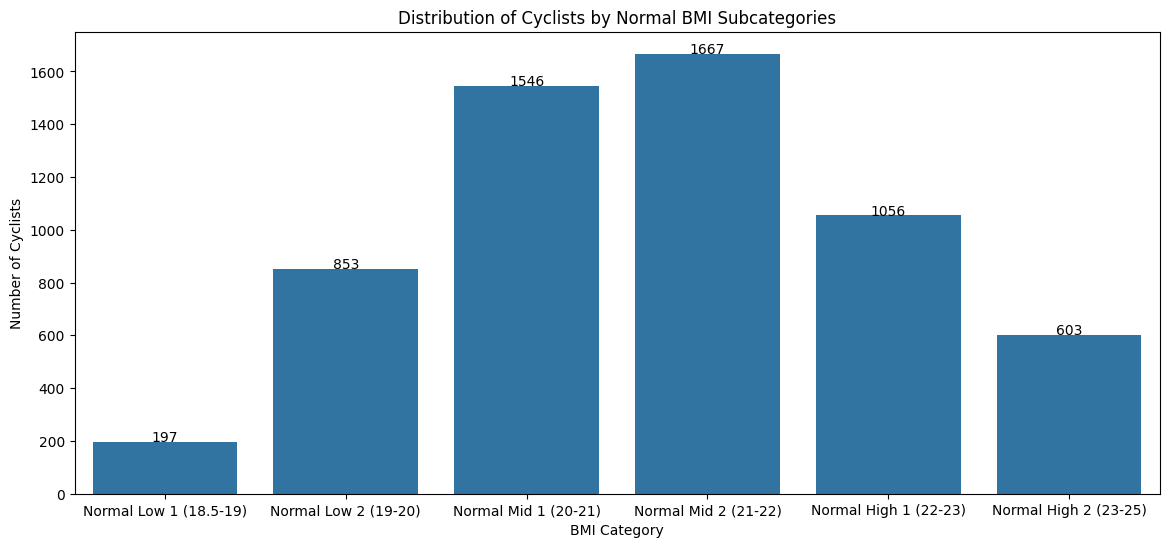

In [185]:
# Define granular Normal BMI categories
labels = [
    'Normal Low 1 (18.5-19)',
    'Normal Low 2 (19-20)',
    'Normal Mid 1 (20-21)',
    'Normal Mid 2 (21-22)',
    'Normal High 1 (22-23)',
    'Normal High 2 (23-25)'
]
bins = [18.5, 19, 20, 21, 22, 23, 25]

# Categorize cyclists based on the new Normal BMI categories
bmi_categories = pd.cut(
    cyclists_df['bmi'],
    bins=bins,
    labels=labels,
    right=False
)
bmi_category_counts = bmi_categories.value_counts().reindex(labels, fill_value=0)

# Plot the distribution of Normal BMI categories
plt.figure(figsize=(14, 6))
sns.countplot(x=bmi_categories, order=labels)
plt.title('Distribution of Cyclists by Normal BMI Subcategories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cyclists')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline'
    )

plt.show()

We also wanto to do a outlier detection

In [186]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cyclists_df['bmi'].quantile(0.25)
Q3 = cyclists_df['bmi'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outlier_low_bmi = cyclists_df[(cyclists_df['bmi'] < lower_bound) ]
outlier_high_bmi = cyclists_df[(cyclists_df['bmi'] > upper_bound)]

print(f"Cyclists have higher BMI outliers (tot numbe = {outlier_high_bmi['name'].count()}):")
print(outlier_high_bmi[['name', 'bmi']])

print(f"Cyclists have lower BMI outliers (tot numbe = {outlier_low_bmi['name'].count()}):")
print(outlier_low_bmi[['name', 'bmi']])

Cyclists have higher BMI outliers (tot numbe = 70):
                                     name   bmi
151                          darren  lill  25.1
221                       nico  verhoeven  26.3
348                       jonas  rickaert  25.2
359                       javier  etxarri  25.9
689                        maxim  rudenko  25.3
...                                   ...   ...
5873  josé francisco  rodriguez maldonado  25.1
5913                    magnus  bäckstedt  25.0
5931                jurgen van roosbroeck  25.0
5965                         ebel  keizer  25.7
6030                     leonardo  sierra  28.7

[70 rows x 2 columns]
Cyclists have lower BMI outliers (tot numbe = 14):
                         name   bmi
371           lars  wahlqvist  16.7
979           bruno  langlois  17.2
1067         daniel  arroyave  16.4
1377       crescenzo  d'amore  17.1
1391           serge  lapebie  17.0
1530      uladzimir  murauski  16.7
3224  valentin  paret-peintre  16.8
3847      

#### **Number of Races Participated**

In [191]:
# Count the number of participations for each cyclist in races_df
participation_counts = races_df['cyclist'].value_counts()

# Map the participation counts to the cyclists_df
cyclists_df['races_participated'] = cyclists_df['_url'].map(participation_counts).fillna(0).astype(int)

cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5734 entries, 0 to 6133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _url                5734 non-null   string 
 1   name                5734 non-null   string 
 2   birth_year          5734 non-null   Int64  
 3   weight              5734 non-null   Int64  
 4   height              5734 non-null   Int64  
 5   nationality         5734 non-null   string 
 6   bmi                 5734 non-null   Float64
 7   races_participated  5734 non-null   int64  
dtypes: Float64(1), Int64(3), int64(1), string(3)
memory usage: 425.6 KB


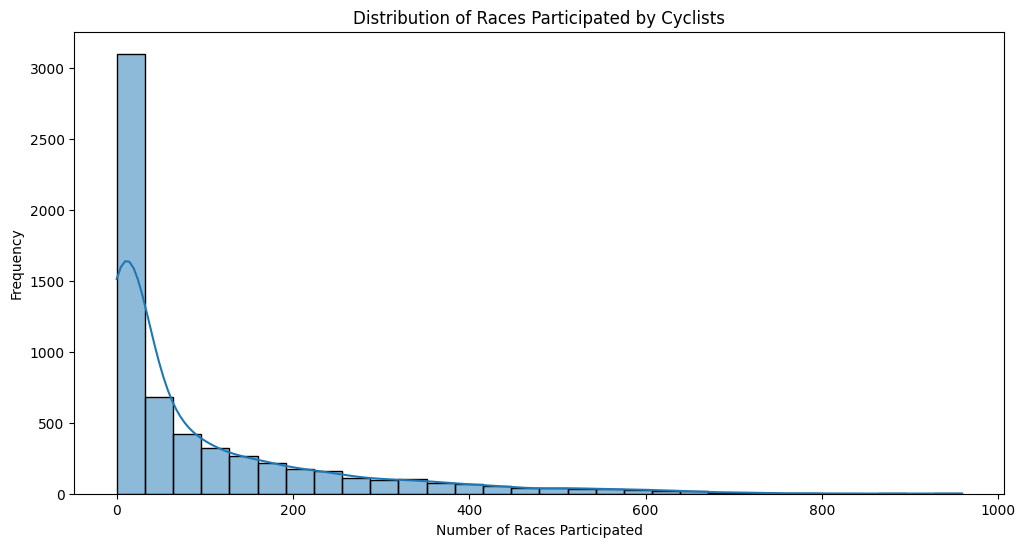

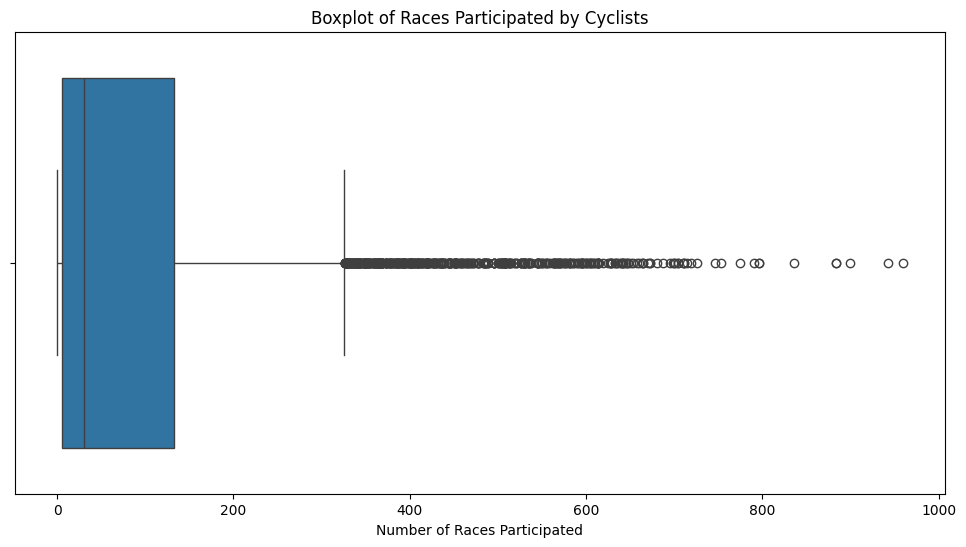

In [188]:
# Histogram of races participated
plt.figure(figsize=(12, 6))
sns.histplot(cyclists_df['races_participated'], bins=30, kde=True)
plt.title('Distribution of Races Participated by Cyclists')
plt.xlabel('Number of Races Participated')
plt.ylabel('Frequency')
plt.show()

# Boxplot of races participated
plt.figure(figsize=(12, 6))
sns.boxplot(x=cyclists_df['races_participated'])
plt.title('Boxplot of Races Participated by Cyclists')
plt.xlabel('Number of Races Participated')
plt.show()

### **Exporting**

Export cleaned datasets for further analysis

In [ ]:
cyclists_df.to_csv('dataset/cyclists_cleaned.csv', index=False)
races_df.to_csv('dataset/races_cleaned.csv', index=False)